In [1]:
import keras,os
import keras.backend as k
import tensorflow as tf
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator 
#from keras.optimizers import Adam
from tensorflow.python.framework.ops import Tensor
from keras.models import Sequential
#from keras.layers.normalization import BatchNormalization
from keras import optimizers
import numpy as np
import keras.backend as k
import tensorflow as tf
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator 
#from keras.optimizers import Adam 
from tensorflow.python.framework.ops import Tensor
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import layers
import cv2
import shutil
import random
import matplotlib.image as mpimg
import glob
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from collections import Counter
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from keras import Model, layers
from keras.models import Sequential
#from keras.optimizers import Adam, SGD
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, Input, Conv2D, MaxPooling2D, Flatten,MaxPooling3D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,load_img
from keras import backend as K
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
img_height=224
img_width=224
batch_size=32

In [ ]:
train_data_dir='/content/drive/MyDrive/SKD/Equalized/GAUSIAN_BLURED_AUGMENTED'
test_data_dir='/content/drive/MyDrive/SKD/Equalized/Test_data'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255) # set validation split

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)
validation_generator = train_datagen.flow_from_directory(test_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)

Found 4368 images belonging to 8 classes.
Found 1020 images belonging to 8 classes.


In [ ]:
model6 = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(224,224,3)),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(96, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(160, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(8, activation='softmax')]) #add last layer

In [ ]:
model6.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history_m6=model6.fit(
    train_generator, epochs=50, validation_data=validation_generator
)

Epoch 1/50
137/137 [==============================] - 2336s 17s/step - loss: 2.0761 - accuracy: 0.1443 - val_loss: 1.9742 - val_accuracy: 0.2494
Epoch 2/50
137/137 [==============================] - 17s 124ms/step - loss: 1.9642 - accuracy: 0.2259 - val_loss: 1.8757 - val_accuracy: 0.2812
Epoch 3/50
137/137 [==============================] - 17s 125ms/step - loss: 1.8205 - accuracy: 0.3022 - val_loss: 1.5955 - val_accuracy: 0.4283
Epoch 4/50
137/137 [==============================] - 16s 119ms/step - loss: 1.5516 - accuracy: 0.4352 - val_loss: 1.3097 - val_accuracy: 0.5386
Epoch 5/50
137/137 [==============================] - 16s 118ms/step - loss: 1.3099 - accuracy: 0.5312 - val_loss: 1.0628 - val_accuracy: 0.6244
Epoch 6/50
137/137 [==============================] - 17s 123ms/step - loss: 1.0857 - accuracy: 0.5986 - val_loss: 0.8903 - val_accuracy: 0.6961
Epoch 7/50
137/137 [==============================] - 17s 126ms/step - loss: 0.9068 - accuracy: 0.6855 - val_loss: 0.8160 - val_ac

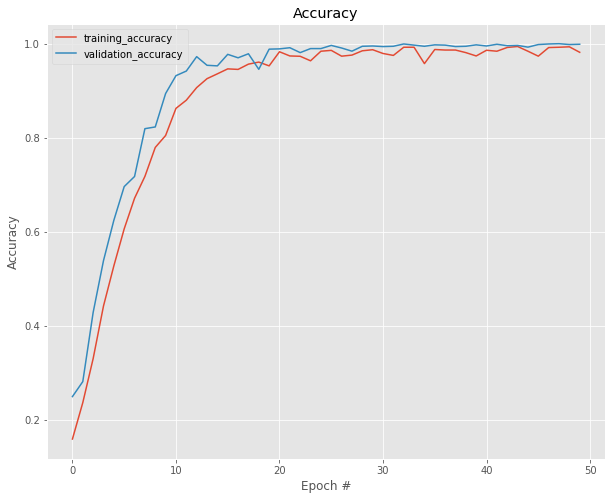

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history_m6.history["accuracy"], label="training_accuracy")
plt.plot(N, history_m6.history["val_accuracy"], label="validation_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("m6 accc.png")

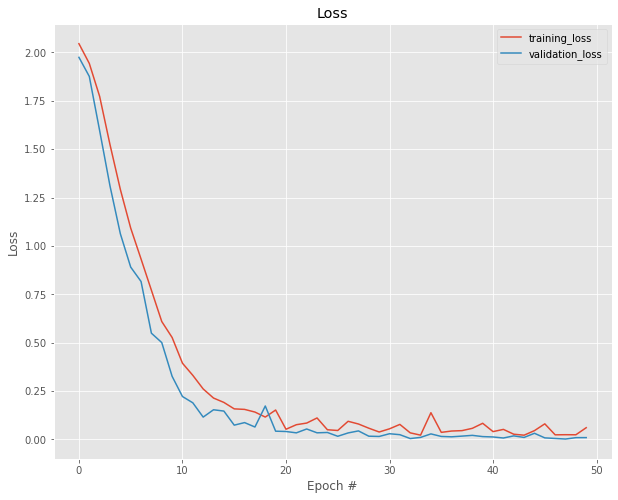

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history_m6.history["loss"], label="training_loss")
plt.plot(N, history_m6.history["val_loss"], label="validation_loss")
plt.title("Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("m6 loose.png")

In [ ]:
test_data_dir='/content/drive/MyDrive/SKD/Equalized/Test_data_three'

In [ ]:
test_generator = train_datagen.flow_from_directory(test_data, 
                                                   target_size=(224, 224),
                                                   batch_size=32) # set as training data


Found 1848 images belonging to 8 classes.


In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_one_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_one_prediction = np.argmax(model6.predict(np.array([img_normalized])))
        model_one_pred.append(model_one_prediction)
        
     

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    
    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    print(classification_report(true_value, model_pred, target_names = list(classes)))

Model Accuracy 0.9761904761904762
              precision    recall  f1-score   support

          AC       0.99      0.98      0.99       231
          AD       0.96      0.98      0.97       231
          EC       0.97      0.97      0.97       231
         IMP       0.98      0.99      0.98       231
          PS       0.97      0.96      0.96       231
          SC       0.95      0.98      0.97       231
         TCO       0.99      0.97      0.98       231
          TP       1.00      0.98      0.99       231

    accuracy                           0.98      1848
   macro avg       0.98      0.98      0.98      1848
weighted avg       0.98      0.98      0.98      1848



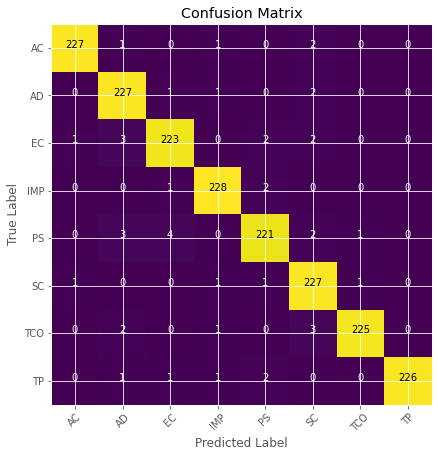

In [ ]:
clf_report(true_value, model_one_pred)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
model6.save('model6')

INFO:tensorflow:Assets written to: model6/assets


In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 6s 0us/step


In [ ]:
model1 = Sequential()
for layer in vgg16_model.layers[:-1]:   #remove last layers 
    model1.add(layer)
for layer in model1.layers:
    layer.trainable = False
model1.add(Dense(units=8, activation='softmax'))

In [ ]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history3=model1.fit(
    train_generator, epochs=50, validation_data=validation_generator
)

Epoch 1/50
137/137 [==============================] - 41s 203ms/step - loss: 2.0947 - accuracy: 0.1892 - val_loss: 1.8820 - val_accuracy: 0.3027
Epoch 2/50
137/137 [==============================] - 25s 183ms/step - loss: 1.7887 - accuracy: 0.2978 - val_loss: 1.7370 - val_accuracy: 0.3456
Epoch 3/50
137/137 [==============================] - 25s 180ms/step - loss: 1.7050 - accuracy: 0.3538 - val_loss: 1.5591 - val_accuracy: 0.3836
Epoch 4/50
137/137 [==============================] - 24s 176ms/step - loss: 1.6513 - accuracy: 0.3728 - val_loss: 1.5282 - val_accuracy: 0.4259
Epoch 5/50
137/137 [==============================] - 24s 178ms/step - loss: 1.5855 - accuracy: 0.4055 - val_loss: 1.4377 - val_accuracy: 0.4669
Epoch 6/50
137/137 [==============================] - 25s 180ms/step - loss: 1.5687 - accuracy: 0.4086 - val_loss: 1.5674 - val_accuracy: 0.4308
Epoch 7/50
137/137 [==============================] - 25s 179ms/step - loss: 1.6052 - accuracy: 0.3836 - val_loss: 1.4234 - val_ac

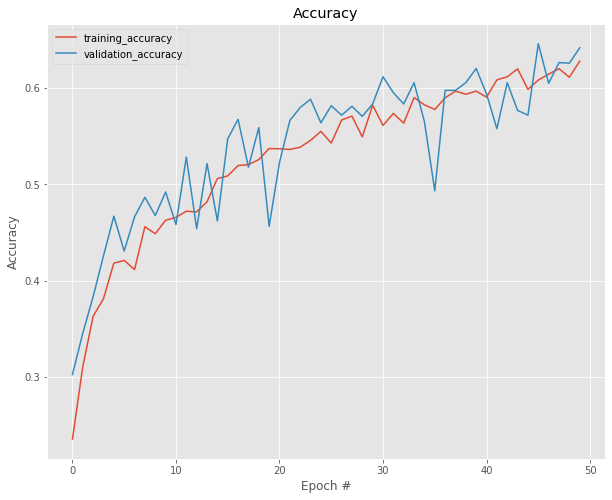

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history3.history["accuracy"], label="training_accuracy")
plt.plot(N, history3.history["val_accuracy"], label="validation_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("m2 accuracy.png")

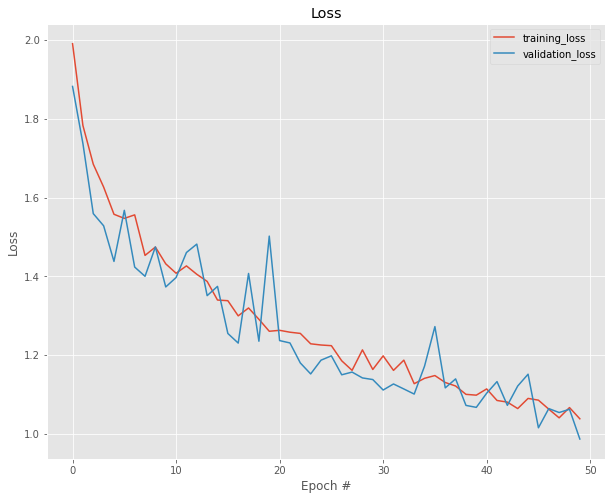

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history3.history["loss"], label="training_loss")
plt.plot(N, history3.history["val_loss"], label="validation_loss")
plt.title("Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("m2 loose.png")


In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_two_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_one_prediction = np.argmax(model1.predict(np.array([img_normalized])))
        model_two_pred.append(model_one_prediction)
        
     

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    
    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    print(classification_report(true_value, model_pred, target_names = list(classes)))

Model Accuracy 0.6260822510822511
              precision    recall  f1-score   support

          AC       0.49      0.89      0.63       231
          AD       0.45      0.65      0.53       231
          EC       0.67      0.55      0.60       231
         IMP       0.82      0.63      0.71       231
          PS       0.81      0.68      0.74       231
          SC       0.56      0.63      0.59       231
         TCO       0.77      0.41      0.53       231
          TP       0.84      0.58      0.68       231

    accuracy                           0.63      1848
   macro avg       0.68      0.63      0.63      1848
weighted avg       0.68      0.63      0.63      1848



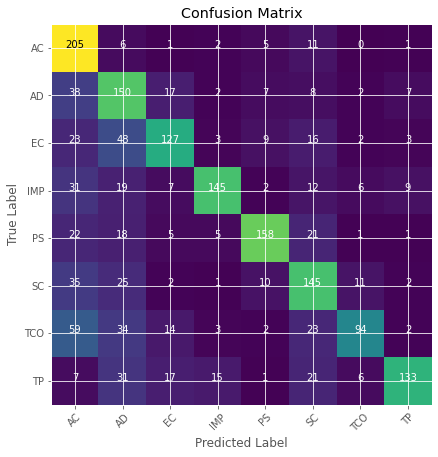

In [ ]:
clf_report(true_value, model_two_pred)

In [ ]:
model1.save('model7')

INFO:tensorflow:Assets written to: model7/assets


INFO:tensorflow:Assets written to: model7/assets


In [ ]:
model3 = Sequential()
for layer in vgg16_model.layers[:-3]:   #remove last layers 
    model3.add(layer)
for layer in model3.layers:
    layer.trainable = False
model3.add(Dense(units=1024, activation='relu'))
#model3.add(Dropout(0.25))
model3.add(Dense(units=1024, activation='relu'))
#model3.add(Dropout(0.25))
model3.add(Dense(units=8, activation='softmax'))

In [ ]:
model3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history4=model3.fit(
    train_generator, epochs=50, validation_data=validation_generator
)

Epoch 1/50
137/137 [==============================] - 44s 313ms/step - loss: 1.9886 - accuracy: 0.3684 - val_loss: 1.1760 - val_accuracy: 0.5804
Epoch 2/50
 75/137 [===============>..............] - ETA: 15s - loss: 1.1469 - accuracy: 0.5783

KeyboardInterrupt: ignored

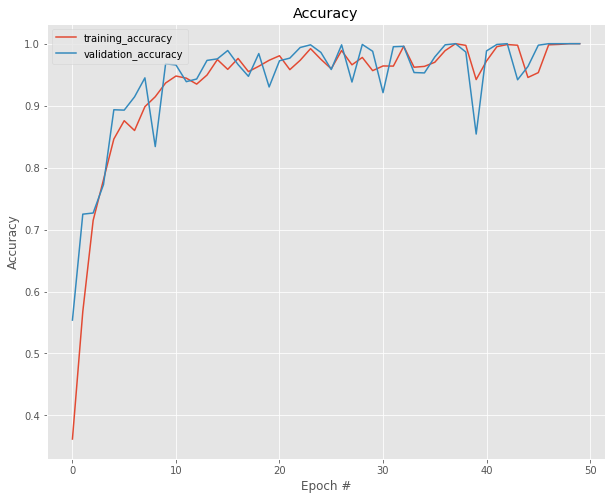

In [ ]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs_range = range(50)
#plt.style.use("ggplot")
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epoch #")

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch #")
plt.show()

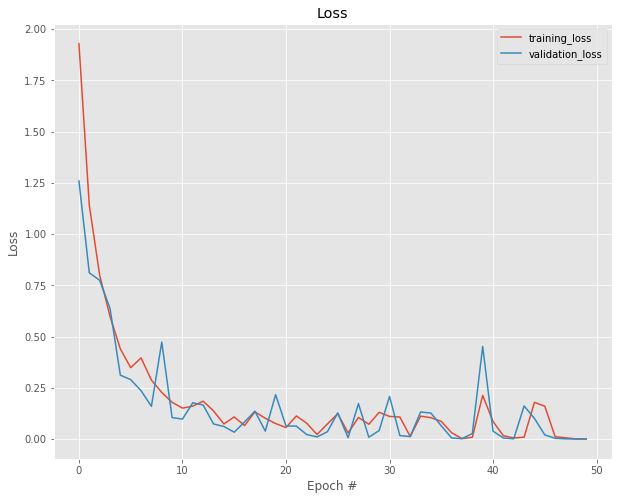

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history4.history["loss"], label="training_loss")
plt.plot(N, history4.history["val_loss"], label="validation_loss")
plt.title("Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("m3 loose.png")


In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_three_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_one_prediction = np.argmax(model3.predict(np.array([img_normalized])))
        model_three_pred.append(model_one_prediction)
        
     

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    
    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    print(classification_report(true_value, model_pred, target_names = list(classes)))

Model Accuracy 0.9767316017316018
              precision    recall  f1-score   support

          AC       1.00      0.96      0.98       231
          AD       0.99      0.96      0.98       231
          EC       0.95      0.99      0.97       231
         IMP       1.00      0.97      0.99       231
          PS       0.94      1.00      0.97       231
          SC       0.95      0.97      0.96       231
         TCO       1.00      0.98      0.99       231
          TP       1.00      0.98      0.99       231

    accuracy                           0.98      1848
   macro avg       0.98      0.98      0.98      1848
weighted avg       0.98      0.98      0.98      1848



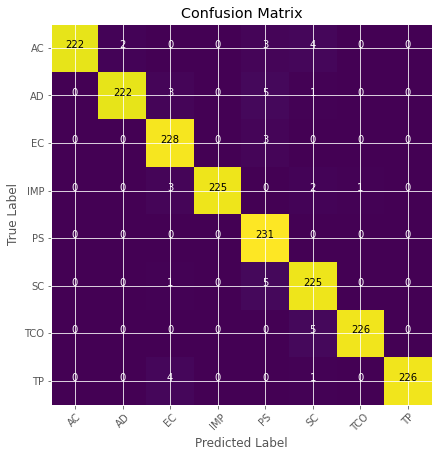

In [ ]:
clf_report(true_value, model_three_pred)

In [ ]:
model3.save('model8')

INFO:tensorflow:Assets written to: model8/assets


INFO:tensorflow:Assets written to: model8/assets


In [ ]:
#ensemble model

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
ensemble_pred = []
model_one_pred = []
model_two_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        #model one prediction
        model_one_prediction = np.argmax(model6.predict(np.array([img_normalized])))
        model_one_pred.append(model_one_prediction)  
        #model two prediction
        model_two_prediction = np.argmax(model3.predict(np.array([img_normalized])))
        model_two_pred.append(model_two_prediction)
        #majority voting Ensemble
        ensemble_model_prediction = mode([model_one_prediction, model_two_prediction])                                  
        ensemble_pred.append(ensemble_model_prediction)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    
    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    print(classification_report(true_value, model_pred, target_names = list(classes)))

Model Accuracy 0.9761904761904762
              precision    recall  f1-score   support

          AC       0.99      0.98      0.99       231
          AD       0.96      0.98      0.97       231
          EC       0.97      0.97      0.97       231
         IMP       0.98      0.99      0.98       231
          PS       0.97      0.96      0.96       231
          SC       0.95      0.98      0.97       231
         TCO       0.99      0.97      0.98       231
          TP       1.00      0.98      0.99       231

    accuracy                           0.98      1848
   macro avg       0.98      0.98      0.98      1848
weighted avg       0.98      0.98      0.98      1848



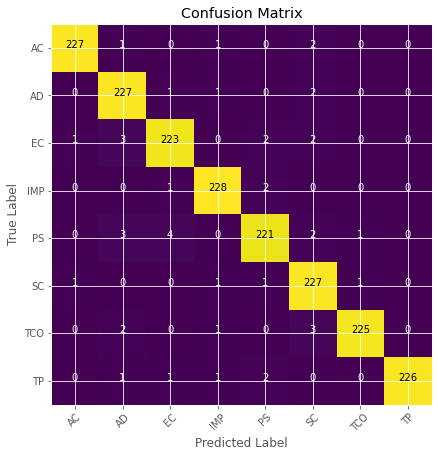

In [ ]:
ensemble_pred = [ c[0] for c in ensemble_pred]
clf_report(true_value, ensemble_pred)

In [ ]:
model4 = Sequential()
for layer in vgg16_model.layers[:-2]:   #remove last layers 
    model4.add(layer)
for layer in model4.layers:
    layer.trainable = False
model4.add(Dense(units=1024, activation='relu'))
model4.add(Dense(units=8, activation='softmax'))

In [ ]:
model4.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history5=model4.fit(
    train_generator, epochs=50, validation_data=validation_generator
)

Epoch 1/50
137/137 [==============================] - 26s 174ms/step - loss: 9.2134 - accuracy: 0.1500 - val_loss: 1.9696 - val_accuracy: 0.1942
Epoch 2/50
137/137 [==============================] - 23s 169ms/step - loss: 1.9857 - accuracy: 0.2365 - val_loss: 1.8297 - val_accuracy: 0.2843
Epoch 3/50
137/137 [==============================] - 23s 170ms/step - loss: 1.8932 - accuracy: 0.2523 - val_loss: 1.7549 - val_accuracy: 0.3321
Epoch 4/50
137/137 [==============================] - 24s 172ms/step - loss: 1.8098 - accuracy: 0.3027 - val_loss: 1.7192 - val_accuracy: 0.2831
Epoch 5/50
137/137 [==============================] - 23s 171ms/step - loss: 1.7269 - accuracy: 0.3355 - val_loss: 1.7508 - val_accuracy: 0.3523
Epoch 6/50
137/137 [==============================] - 24s 172ms/step - loss: 1.7178 - accuracy: 0.3455 - val_loss: 1.6609 - val_accuracy: 0.3934
Epoch 7/50
137/137 [==============================] - 24s 173ms/step - loss: 1.7166 - accuracy: 0.3600 - val_loss: 1.7336 - val_ac

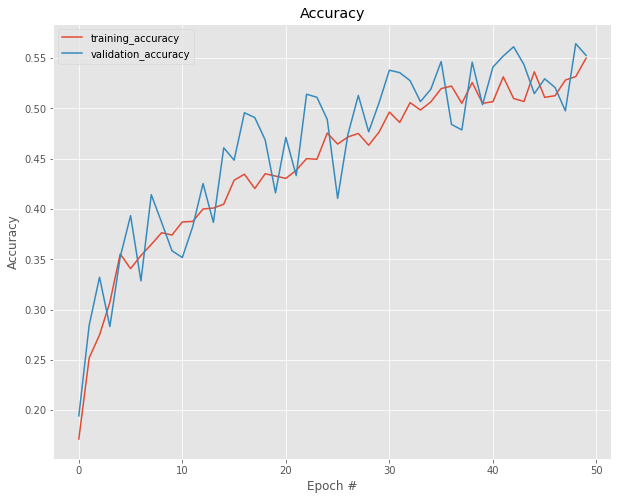

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history5.history["accuracy"], label="training_accuracy")
plt.plot(N, history5.history["val_accuracy"], label="validation_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("m7 accuracy.png")

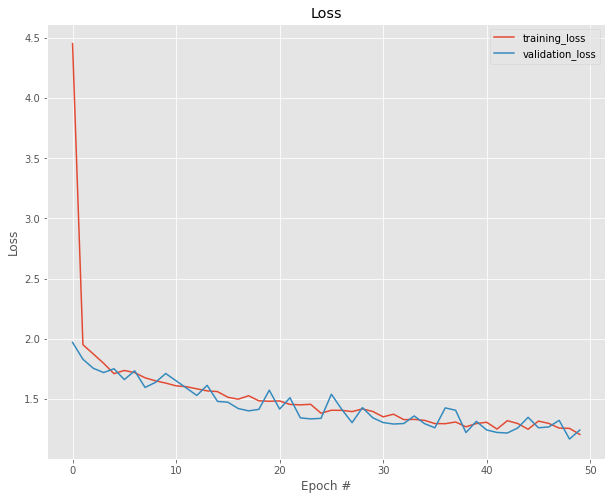

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history5.history["loss"], label="training_loss")
plt.plot(N, history5.history["val_loss"], label="validation_loss")
plt.title("Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("m7 loose.png")


In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_two_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_one_prediction = np.argmax(model4.predict(np.array([img_normalized])))
        model_two_pred.append(model_one_prediction)
        
     

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    
    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    print(classification_report(true_value, model_pred, target_names = list(classes)))

Model Accuracy 0.5427489177489178
              precision    recall  f1-score   support

          AC       0.51      0.85      0.64       231
          AD       0.37      0.54      0.44       231
          EC       0.45      0.58      0.51       231
         IMP       0.72      0.61      0.67       231
          PS       0.78      0.63      0.70       231
          SC       0.74      0.12      0.21       231
         TCO       0.49      0.36      0.42       231
          TP       0.61      0.65      0.63       231

    accuracy                           0.54      1848
   macro avg       0.58      0.54      0.53      1848
weighted avg       0.58      0.54      0.53      1848



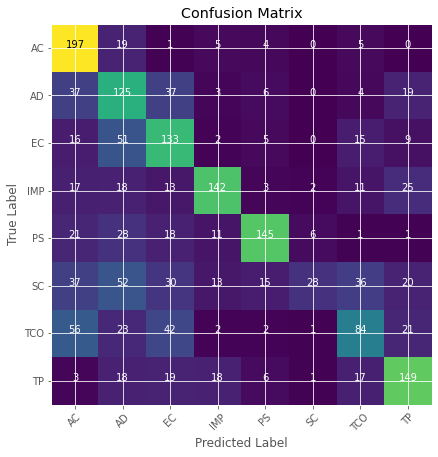

In [ ]:
clf_report(true_value, model_two_pred)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                    subset='training')
validation_generator = train_datagen.flow_from_directory(test_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32,subset='validation')

Found 3496 images belonging to 8 classes.
Found 320 images belonging to 8 classes.


In [ ]:
model10 = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(224,224,3)),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(96, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(160, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='softmax')]) #add last layer

In [ ]:
model10.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history5=model10.fit(
    train_generator, epochs=50, validation_data=validation_generator
)

Epoch 1/50
110/110 [==============================] - 20s 165ms/step - loss: 2.0812 - accuracy: 0.1281 - val_loss: 2.0719 - val_accuracy: 0.1319
Epoch 2/50
110/110 [==============================] - 17s 155ms/step - loss: 2.0472 - accuracy: 0.1796 - val_loss: 1.9897 - val_accuracy: 0.2030
Epoch 3/50
110/110 [==============================] - 17s 155ms/step - loss: 2.0102 - accuracy: 0.1849 - val_loss: 1.9773 - val_accuracy: 0.2236
Epoch 4/50
110/110 [==============================] - 17s 154ms/step - loss: 1.9806 - accuracy: 0.2219 - val_loss: 1.9512 - val_accuracy: 0.2729
Epoch 5/50
110/110 [==============================] - 17s 154ms/step - loss: 1.9545 - accuracy: 0.2467 - val_loss: 1.9003 - val_accuracy: 0.2683
Epoch 6/50
110/110 [==============================] - 17s 155ms/step - loss: 1.9423 - accuracy: 0.2463 - val_loss: 1.9640 - val_accuracy: 0.2041
Epoch 7/50
110/110 [==============================] - 17s 155ms/step - loss: 1.9250 - accuracy: 0.2662 - val_loss: 1.8292 - val_ac

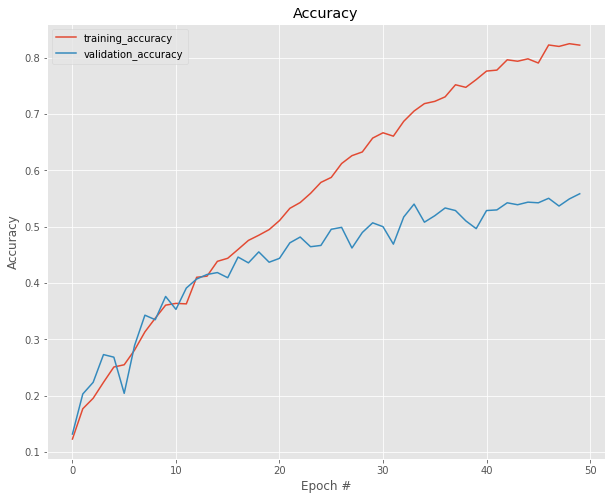

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history5.history["accuracy"], label="training_accuracy")
plt.plot(N, history5.history["val_accuracy"], label="validation_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("m7 accuracy.png")

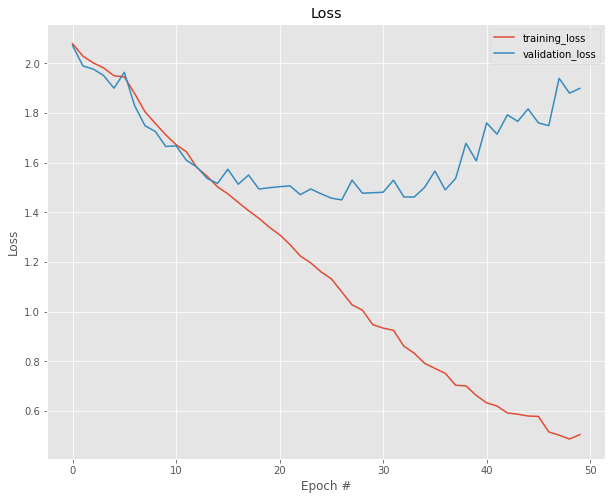

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history5.history["loss"], label="training_loss")
plt.plot(N, history5.history["val_loss"], label="validation_loss")
plt.title("Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("m7 loose.png")


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255) # set validation split

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)
validation_generator = train_datagen.flow_from_directory(test_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)

Found 4368 images belonging to 8 classes.
Found 1632 images belonging to 8 classes.


In [ ]:
model11 = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(224,224,3)),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(96, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(160, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='softmax')]) #add last layer

In [ ]:
model11.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history5=model11.fit(
    train_generator, epochs=50, validation_data=validation_generator
)

Epoch 1/50
137/137 [==============================] - 37s 260ms/step - loss: 2.0747 - accuracy: 0.1248 - val_loss: 1.9665 - val_accuracy: 0.2463
Epoch 2/50
137/137 [==============================] - 23s 169ms/step - loss: 1.9174 - accuracy: 0.2705 - val_loss: 1.8405 - val_accuracy: 0.3260
Epoch 3/50
137/137 [==============================] - 23s 168ms/step - loss: 1.7908 - accuracy: 0.3304 - val_loss: 1.6748 - val_accuracy: 0.3756
Epoch 4/50
137/137 [==============================] - 23s 168ms/step - loss: 1.6569 - accuracy: 0.3902 - val_loss: 1.5513 - val_accuracy: 0.4338
Epoch 5/50
137/137 [==============================] - 23s 168ms/step - loss: 1.5270 - accuracy: 0.4310 - val_loss: 1.4776 - val_accuracy: 0.4620
Epoch 6/50
137/137 [==============================] - 23s 167ms/step - loss: 1.4013 - accuracy: 0.4868 - val_loss: 1.2550 - val_accuracy: 0.5263
Epoch 7/50
137/137 [==============================] - 23s 168ms/step - loss: 1.2994 - accuracy: 0.4986 - val_loss: 1.2259 - val_ac

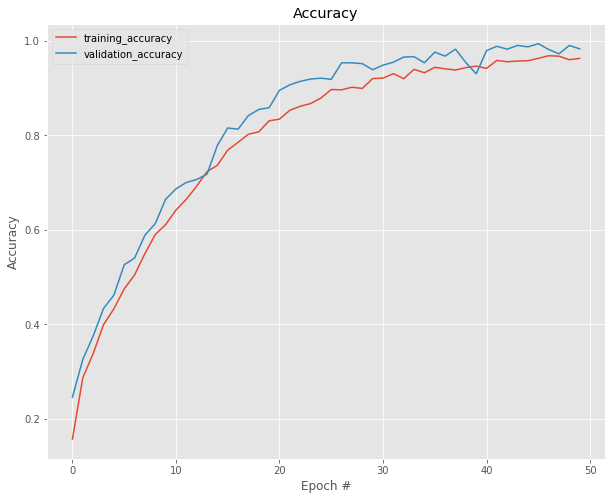

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history5.history["accuracy"], label="training_accuracy")
plt.plot(N, history5.history["val_accuracy"], label="validation_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("m8 accuracy.png")

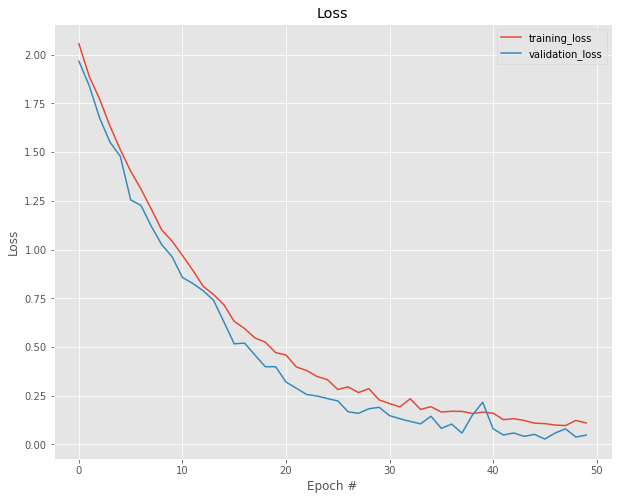

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history5.history["loss"], label="training_loss")
plt.plot(N, history5.history["val_loss"], label="validation_loss")
plt.title("Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("m8 loose.png")


In [ ]:
model11 = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(224,224,3)),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(96, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(160, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Flatten(),
    layers.Dense(40, activation='relu'),
    layers.Dense(40, activation='relu'),
    layers.Dense(8, activation='softmax')]) #add last layer

In [ ]:
model11.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history5=model11.fit(
    train_generator, epochs=50, validation_data=validation_generator
)

Epoch 1/50
137/137 [==============================] - 26s 176ms/step - loss: 2.0745 - accuracy: 0.1262 - val_loss: 1.9877 - val_accuracy: 0.2126
Epoch 2/50
137/137 [==============================] - 23s 169ms/step - loss: 1.9639 - accuracy: 0.2447 - val_loss: 1.8973 - val_accuracy: 0.2702
Epoch 3/50
137/137 [==============================] - 23s 169ms/step - loss: 1.8899 - accuracy: 0.2640 - val_loss: 1.8332 - val_accuracy: 0.2806
Epoch 4/50
137/137 [==============================] - 23s 168ms/step - loss: 1.8269 - accuracy: 0.2998 - val_loss: 1.8572 - val_accuracy: 0.3027
Epoch 5/50
137/137 [==============================] - 23s 169ms/step - loss: 1.7912 - accuracy: 0.3260 - val_loss: 1.7308 - val_accuracy: 0.3388
Epoch 6/50
137/137 [==============================] - 23s 168ms/step - loss: 1.7282 - accuracy: 0.3384 - val_loss: 1.7012 - val_accuracy: 0.3536
Epoch 7/50
137/137 [==============================] - 23s 168ms/step - loss: 1.7564 - accuracy: 0.3371 - val_loss: 1.7445 - val_ac

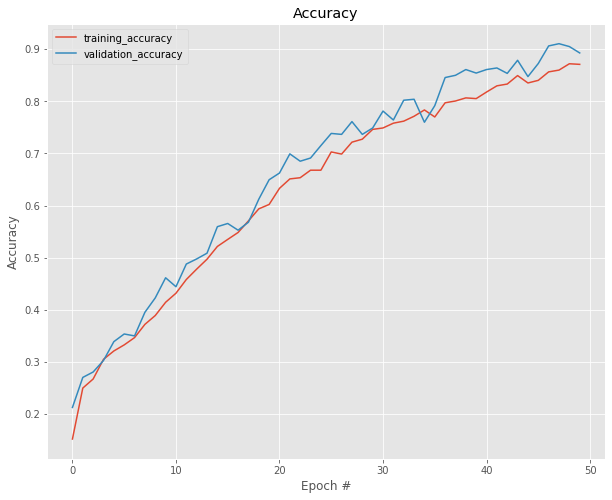

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history5.history["accuracy"], label="training_accuracy")
plt.plot(N, history5.history["val_accuracy"], label="validation_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("m9 accuracy.png")

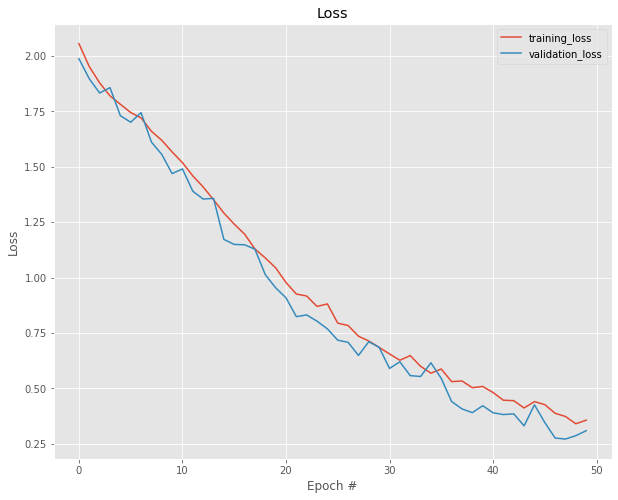

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history5.history["loss"], label="training_loss")
plt.plot(N, history5.history["val_loss"], label="validation_loss")
plt.title("Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("m9 loose.png")


In [ ]:
model11 = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(224,224,3)),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(96, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(160, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(8, activation='softmax')]) #add last layer

In [ ]:
model11.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history5=model11.fit(
    train_generator, epochs=50, validation_data=validation_generator
)

Epoch 1/50
137/137 [==============================] - 26s 176ms/step - loss: 2.0714 - accuracy: 0.1327 - val_loss: 1.9823 - val_accuracy: 0.1979
Epoch 2/50
137/137 [==============================] - 24s 171ms/step - loss: 1.9801 - accuracy: 0.2221 - val_loss: 1.8624 - val_accuracy: 0.3021
Epoch 3/50
137/137 [==============================] - 24s 173ms/step - loss: 1.8198 - accuracy: 0.3244 - val_loss: 1.6114 - val_accuracy: 0.4259
Epoch 4/50
137/137 [==============================] - 24s 172ms/step - loss: 1.5505 - accuracy: 0.4364 - val_loss: 1.3242 - val_accuracy: 0.5135
Epoch 5/50
137/137 [==============================] - 24s 173ms/step - loss: 1.3097 - accuracy: 0.5196 - val_loss: 1.0854 - val_accuracy: 0.6244
Epoch 6/50
137/137 [==============================] - 24s 171ms/step - loss: 1.0201 - accuracy: 0.6266 - val_loss: 0.7658 - val_accuracy: 0.7426
Epoch 7/50
137/137 [==============================] - 24s 171ms/step - loss: 0.7576 - accuracy: 0.7341 - val_loss: 0.5909 - val_ac

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history5.history["accuracy"], label="training_accuracy")
plt.plot(N, history5.history["val_accuracy"], label="validation_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("m10 accuracy.png")

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history5.history["loss"], label="training_loss")
plt.plot(N, history5.history["val_loss"], label="validation_loss")
plt.title("Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("m10 loose.png")

In [ ]:
===============================================================================

In [ ]:
train_data_dir='/content/drive/MyDrive/SKD/Equalized/GAUSIAN_BLURED_AUGMENTED'
test_data_dir='/content/drive/MyDrive/SKD/Equalized/Test_data'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)# set validation split

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                    subset='training')
validation_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   subset='validation')

Found 3496 images belonging to 8 classes.
Found 872 images belonging to 8 classes.


In [ ]:
model11 = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(224,224,3)),
    #layers.Dropout(0.01),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    #layers.Dropout(0.01),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(96, 3, padding='same', activation='relu'),
    #layers.Dropout(0.01),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    #layers.Dropout(0.01),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(160, 3, padding='same', activation='relu'),
    layers.Dropout(0.01),
    layers.AveragePooling2D(2,2),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    #layers.Dense(12, activation='relu'),
    layers.Dense(8, activation='softmax')]) #add last layer

In [ ]:
model11.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history5=model11.fit(
    train_generator, epochs=50, validation_data=validation_generator
)

Epoch 1/50
110/110 [==============================] - 1111s 10s/step - loss: 2.0787 - accuracy: 0.1334 - val_loss: 2.0556 - val_accuracy: 0.1651
Epoch 2/50
110/110 [==============================] - 353s 3s/step - loss: 2.0552 - accuracy: 0.1615 - val_loss: 2.0459 - val_accuracy: 0.2431
Epoch 3/50
110/110 [==============================] - 354s 3s/step - loss: 2.0332 - accuracy: 0.1882 - val_loss: 1.9817 - val_accuracy: 0.1812
Epoch 4/50
110/110 [==============================] - 353s 3s/step - loss: 1.9904 - accuracy: 0.1808 - val_loss: 1.9440 - val_accuracy: 0.1904
Epoch 5/50
110/110 [==============================] - 354s 3s/step - loss: 1.9553 - accuracy: 0.2069 - val_loss: 1.8919 - val_accuracy: 0.2615
Epoch 6/50
110/110 [==============================] - 354s 3s/step - loss: 1.8929 - accuracy: 0.2658 - val_loss: 1.8759 - val_accuracy: 0.2775
Epoch 7/50
110/110 [==============================] - 351s 3s/step - loss: 1.8108 - accuracy: 0.3082 - val_loss: 1.7830 - val_accuracy: 0.30

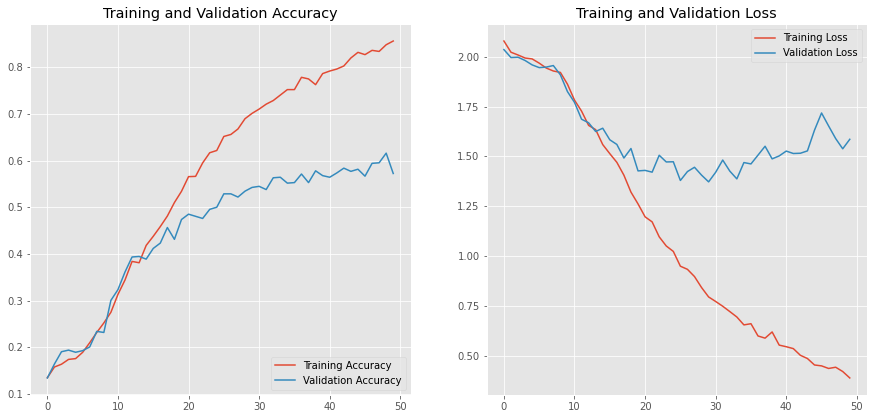

In [ ]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

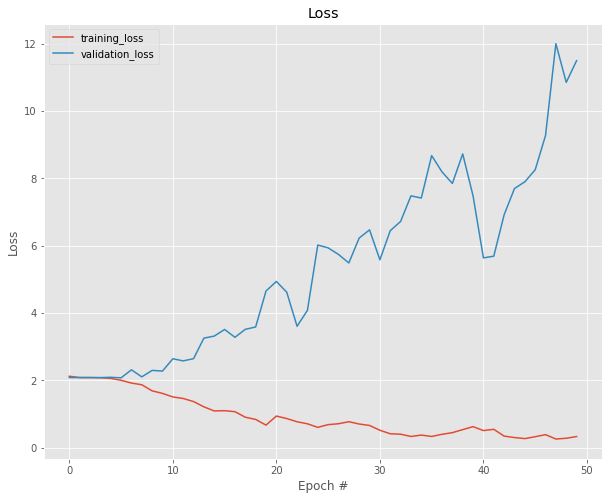

In [ ]:
N = np.arange(0, 50) #data augmentation
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
plt.plot(N, history5.history["loss"], label="training_loss")
plt.plot(N, history5.history["val_loss"], label="validation_loss")
plt.title("Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("m11 loose.png")


In [ ]:
=============Fine tuned ==========

In [ ]:
train_data_dir='/content/drive/MyDrive/SKD/Equalized/GAUSIAN_BLURED_AUGMENTED'
test_data_dir='/content/drive/MyDrive/SKD/Equalized/Test_data'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255) # set validation split

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)
validation_generator = train_datagen.flow_from_directory(test_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)

Found 4368 images belonging to 8 classes.
Found 1020 images belonging to 8 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16_model = tf.keras.applications.vgg16.VGG16()
model1 = Sequential()
for layer in vgg16_model.layers[:-3]:   #remove last layers 
    model1.add(layer)
for layer in model1.layers:
    layer.trainable = False
model1.add(Dense(units=4096, activation='relu')),
model1.add(Dropout(0.01))
model1.add(Dense(units=4096, activation='relu')),
#model1.add(Dropout(0.01))
model1.add(Dense(units=8, activation='softmax'))

In [ ]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history3=model1.fit(
    train_generator, epochs=50, validation_data=validation_generator
)

Epoch 1/50
137/137 [==============================] - 49s 350ms/step - loss: 2.6817 - accuracy: 0.3255 - val_loss: 1.4853 - val_accuracy: 0.4833
Epoch 2/50
137/137 [==============================] - 47s 346ms/step - loss: 1.1852 - accuracy: 0.5618 - val_loss: 0.8146 - val_accuracy: 0.7059
Epoch 3/50
 29/137 [=====>........................] - ETA: 30s - loss: 0.8060 - accuracy: 0.7116

KeyboardInterrupt: ignored

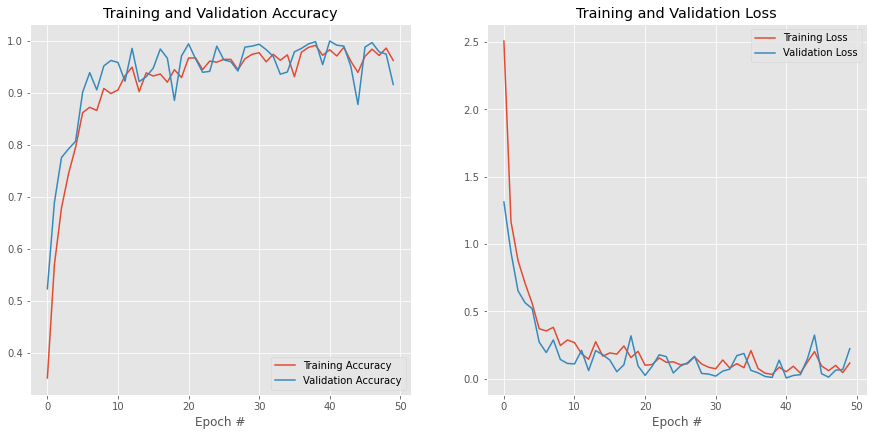

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs_range = range(50)
#plt.style.use("ggplot")
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epoch #")

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch #")
plt.show()

In [ ]:
test_data_dir='/content/drive/MyDrive/SKD/Equalized/Test_data_three'

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255) # set validation split

test_generator = test_datagen.flow_from_directory(test_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)

Found 1848 images belonging to 8 classes.


In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_two_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_one_prediction = np.argmax(model1.predict(np.array([img_normalized])))
        model_two_pred.append(model_one_prediction)
        
     

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    
    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    print(classification_report(true_value, model_pred, target_names = list(classes)))

Model Accuracy 0.8982683982683982
              precision    recall  f1-score   support

          AC       1.00      0.88      0.94       231
          AD       0.97      0.77      0.86       231
          EC       0.98      0.75      0.85       231
         IMP       0.69      0.98      0.81       231
          PS       0.94      0.93      0.93       231
          SC       0.87      0.98      0.92       231
         TCO       0.90      0.94      0.92       231
          TP       0.96      0.95      0.96       231

    accuracy                           0.90      1848
   macro avg       0.92      0.90      0.90      1848
weighted avg       0.92      0.90      0.90      1848



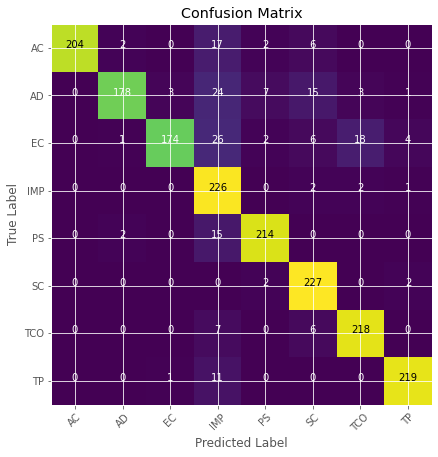

In [ ]:
clf_report(true_value, model_two_pred)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16_model = tf.keras.applications.vgg16.VGG16()
model1 = Sequential()
for layer in vgg16_model.layers[:-3]:   #remove last layers 
    model1.add(layer)
for layer in model1.layers:
    layer.trainable = False
model1.add(Dense(units=32, activation='relu')),
model1.add(Dropout(0.01))
model1.add(Dense(units=32, activation='relu')),
model1.add(Dropout(0.01))
model1.add(Dense(units=8, activation='softmax'))

In [ ]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history3=model1.fit(
    train_generator, epochs=50, validation_data=validation_generator
)

Epoch 1/50
137/137 [==============================] - 27s 183ms/step - loss: 1.9891 - accuracy: 0.2521 - val_loss: 1.5632 - val_accuracy: 0.3971
Epoch 2/50
137/137 [==============================] - 25s 183ms/step - loss: 1.5252 - accuracy: 0.4290 - val_loss: 1.1696 - val_accuracy: 0.6189
Epoch 3/50
137/137 [==============================] - 24s 175ms/step - loss: 1.2017 - accuracy: 0.5676 - val_loss: 0.9989 - val_accuracy: 0.6317
Epoch 4/50
137/137 [==============================] - 24s 175ms/step - loss: 1.0041 - accuracy: 0.6441 - val_loss: 0.8109 - val_accuracy: 0.7181
Epoch 5/50
137/137 [==============================] - 24s 178ms/step - loss: 0.8515 - accuracy: 0.6941 - val_loss: 0.6783 - val_accuracy: 0.7721
Epoch 6/50
137/137 [==============================] - 25s 179ms/step - loss: 0.7526 - accuracy: 0.7345 - val_loss: 0.6486 - val_accuracy: 0.7776
Epoch 7/50
137/137 [==============================] - 24s 178ms/step - loss: 0.5976 - accuracy: 0.7999 - val_loss: 0.4891 - val_ac

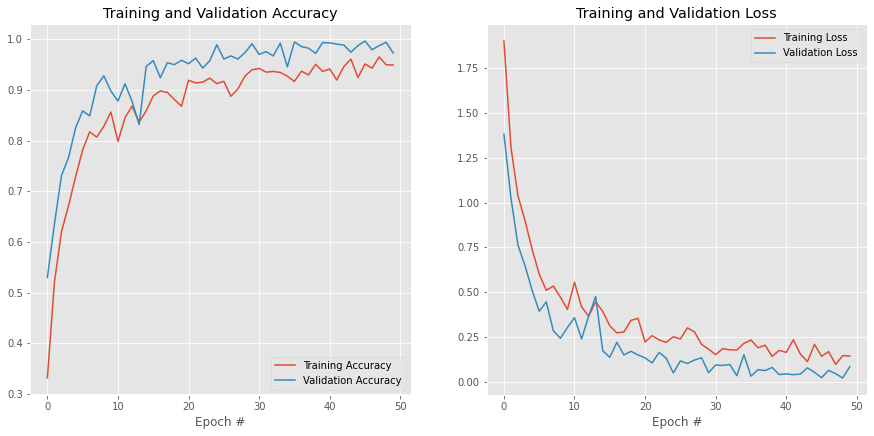

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs_range = range(50)
plt.style.use("ggplot")
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epoch #")

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch #")
plt.show()

In [ ]:
=============model development===========================

In [ ]:
train_data_dir='/content/drive/MyDrive/SKD/Equalized/GAUSIAN_BLURED_AUGMENTED'
test_data_dir='/content/drive/MyDrive/SKD/Equalized/Test_data_three'


train_datagen = ImageDataGenerator(rescale=1./255) # set validation split

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)
validation_generator = train_datagen.flow_from_directory(test_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)

Found 4368 images belonging to 8 classes.
Found 1848 images belonging to 8 classes.


In [ ]:
model1 = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(224,224,3)),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(96, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Conv2D(160, 3, padding='same', activation='relu'),
    layers.Dropout(0.25),
    layers.AveragePooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(8, activation='softmax')]) #add last layer

In [ ]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history_m6=model1.fit(
    train_generator, epochs=50, validation_data=validation_generator
)

Epoch 1/50
137/137 [==============================] - 25s 173ms/step - loss: 2.0239 - accuracy: 0.1832 - val_loss: 1.9060 - val_accuracy: 0.2852
Epoch 2/50
137/137 [==============================] - 24s 172ms/step - loss: 1.8545 - accuracy: 0.3061 - val_loss: 1.7102 - val_accuracy: 0.3669
Epoch 3/50
137/137 [==============================] - 23s 171ms/step - loss: 1.6957 - accuracy: 0.3697 - val_loss: 1.5855 - val_accuracy: 0.4237
Epoch 4/50
137/137 [==============================] - 23s 170ms/step - loss: 1.5334 - accuracy: 0.4425 - val_loss: 1.4786 - val_accuracy: 0.4756
Epoch 5/50
137/137 [==============================] - 23s 170ms/step - loss: 1.3842 - accuracy: 0.5027 - val_loss: 1.2669 - val_accuracy: 0.5492
Epoch 6/50
137/137 [==============================] - 23s 170ms/step - loss: 1.2220 - accuracy: 0.5527 - val_loss: 1.1029 - val_accuracy: 0.6250
Epoch 7/50
137/137 [==============================] - 23s 170ms/step - loss: 1.0775 - accuracy: 0.6131 - val_loss: 0.9467 - val_ac

In [ ]:
model1.save('/content/drive/MyDrive/Dataset/Savedmodel/model_one')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset/Savedmodel/model_one/assets


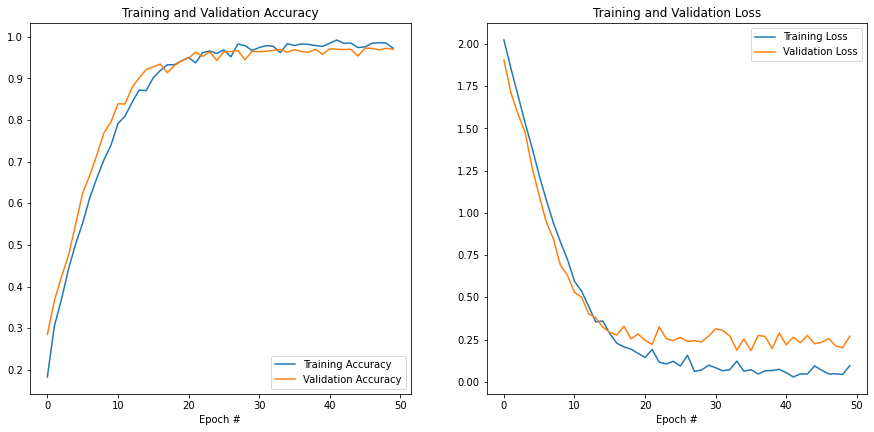

In [ ]:
acc = history_m6.history['accuracy']
val_acc = history_m6.history['val_accuracy']
loss = history_m6.history['loss']
val_loss = history_m6.history['val_loss']
epochs_range = range(50)
#plt.style.use("ggplot")
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epoch #")

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch #")
plt.show()

In [ ]:
test_data_dir='/content/drive/MyDrive/SKD/Equalized/Test_data_three'
test_datagen = ImageDataGenerator(rescale=1./255) # set validation split

test_generator = test_datagen.flow_from_directory(test_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)

Found 1848 images belonging to 8 classes.


In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_one_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        #model one prediction
        model_one_prediction = np.argmax(model1.predict(np.array([img_normalized])))
        model_one_pred.append(model_one_prediction)  
        #model two prediction

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    
    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    print(classification_report(true_value, model_pred, target_names = list(classes)))

Model Accuracy 0.9707792207792207
              precision    recall  f1-score   support

          AC       0.99      0.98      0.98       231
          AD       0.97      0.97      0.97       231
          EC       0.98      0.97      0.97       231
         IMP       0.99      0.97      0.98       231
          PS       0.93      0.97      0.95       231
          SC       0.94      0.97      0.96       231
         TCO       0.97      0.97      0.97       231
          TP       0.99      0.98      0.98       231

    accuracy                           0.97      1848
   macro avg       0.97      0.97      0.97      1848
weighted avg       0.97      0.97      0.97      1848



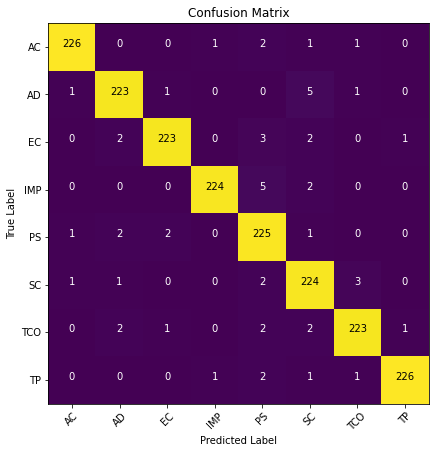

In [ ]:
clf_report(true_value, model_one_pred)

In [ ]:
=========model two =======

In [ ]:
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications
input_shape = (224, 224, 3)

base_model = InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(224, 224,3))
base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dense(64,activation='relu'))
add_model.add(Dropout(0.25))
add_model.add(Dense(8,activation='softmax'))

model3 = add_model
model3.compile(optimizer='adam',
    loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_m2=model3.fit(
    train_generator, epochs=50, validation_data=validation_generator
)

Epoch 1/50
137/137 [==============================] - 43s 266ms/step - loss: 1.5477 - accuracy: 0.4325 - val_loss: 1.0307 - val_accuracy: 0.6715
Epoch 2/50
137/137 [==============================] - 31s 229ms/step - loss: 1.0086 - accuracy: 0.6500 - val_loss: 0.7905 - val_accuracy: 0.7657
Epoch 3/50
137/137 [==============================] - 31s 228ms/step - loss: 0.7877 - accuracy: 0.7333 - val_loss: 0.5937 - val_accuracy: 0.8236
Epoch 4/50
137/137 [==============================] - 31s 228ms/step - loss: 0.6289 - accuracy: 0.7869 - val_loss: 0.4447 - val_accuracy: 0.8864
Epoch 5/50
137/137 [==============================] - 31s 228ms/step - loss: 0.5199 - accuracy: 0.8249 - val_loss: 0.3805 - val_accuracy: 0.8966
Epoch 6/50
137/137 [==============================] - 31s 228ms/step - loss: 0.4704 - accuracy: 0.8404 - val_loss: 0.3386 - val_accuracy: 0.9134
Epoch 7/50
137/137 [==============================] - 31s 228ms/step - loss: 0.4102 - accuracy: 0.8645 - val_loss: 0.3197 - val_ac

In [ ]:
model3.save('/content/drive/MyDrive/Dataset/Savedmodel/model_three')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset/Savedmodel/model_three/assets


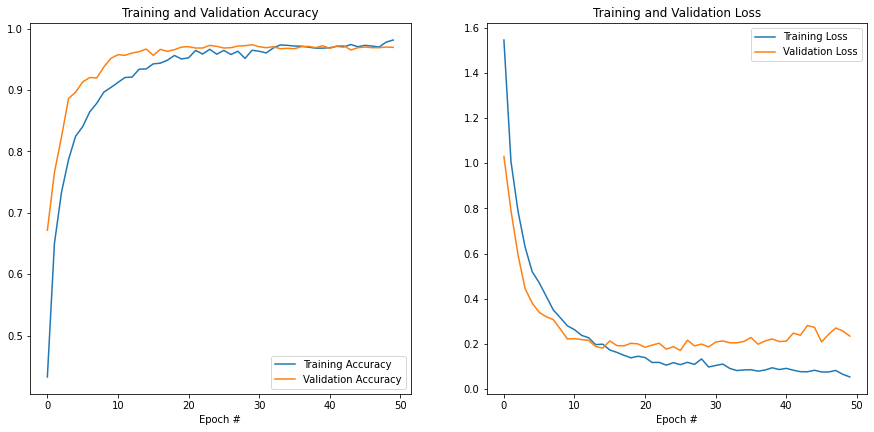

In [ ]:
acc = history_m2.history['accuracy']
val_acc = history_m2.history['val_accuracy']
loss = history_m2.history['loss']
val_loss = history_m2.history['val_loss']
epochs_range = range(50)
#plt.style.use("ggplot")
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epoch #")

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch #")
plt.show()

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_three_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        #model one prediction
        model_three_prediction = np.argmax(model3.predict(np.array([img_normalized])))
        model_three_pred.append(model_three_prediction)  
        #model two prediction

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    
    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    print(classification_report(true_value, model_pred, target_names = list(classes)))

Model Accuracy 0.9724025974025974
              precision    recall  f1-score   support

          AC       1.00      0.97      0.98       231
          AD       0.92      0.98      0.95       231
          EC       0.97      0.97      0.97       231
         IMP       1.00      0.98      0.99       231
          PS       0.98      0.96      0.97       231
          SC       0.95      0.97      0.96       231
         TCO       0.98      0.96      0.97       231
          TP       0.97      0.99      0.98       231

    accuracy                           0.97      1848
   macro avg       0.97      0.97      0.97      1848
weighted avg       0.97      0.97      0.97      1848



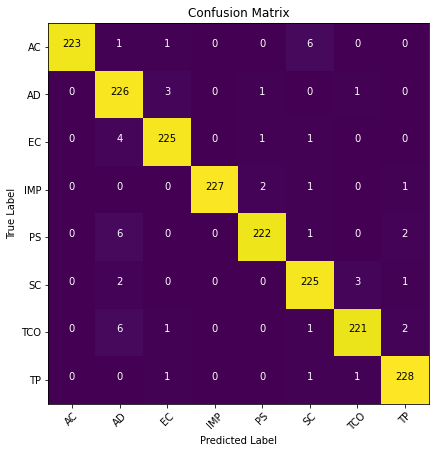

In [ ]:
clf_report(true_value, model_three_pred)

In [ ]:
====================model two====================================================

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16_model = tf.keras.applications.vgg16.VGG16()
model2 = Sequential()
for layer in vgg16_model.layers[:-3]:   #remove last layers 
    model2.add(layer)
for layer in model2.layers:
    layer.trainable = False
model2.add(Dense(units=1024, activation='relu')),
model2.add(Dropout(0.01))
model2.add(Dense(units=1024, activation='relu')),
#model1.add(Dropout(0.01))
model2.add(Dense(units=8, activation='softmax'))

In [ ]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history2=model2.fit(
    train_generator, epochs=50, validation_data=validation_generator
)

Epoch 1/50
137/137 [==============================] - 47s 337ms/step - loss: 2.0229 - accuracy: 0.3658 - val_loss: 1.2316 - val_accuracy: 0.5417
Epoch 2/50
137/137 [==============================] - 46s 335ms/step - loss: 1.2037 - accuracy: 0.5545 - val_loss: 0.9386 - val_accuracy: 0.6688
Epoch 3/50
137/137 [==============================] - 46s 336ms/step - loss: 0.8730 - accuracy: 0.6898 - val_loss: 0.9655 - val_accuracy: 0.6537
Epoch 4/50
137/137 [==============================] - 46s 336ms/step - loss: 0.7022 - accuracy: 0.7450 - val_loss: 0.6019 - val_accuracy: 0.7857
Epoch 5/50
137/137 [==============================] - 46s 336ms/step - loss: 0.4831 - accuracy: 0.8267 - val_loss: 0.4400 - val_accuracy: 0.8588
Epoch 6/50
137/137 [==============================] - 46s 336ms/step - loss: 0.4075 - accuracy: 0.8565 - val_loss: 0.4956 - val_accuracy: 0.8366
Epoch 7/50
137/137 [==============================] - 46s 335ms/step - loss: 0.3776 - accuracy: 0.8658 - val_loss: 0.3855 - val_ac

In [ ]:
model2.save('/content/drive/MyDrive/Dataset/Savedmodel/model_two')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset/Savedmodel/model_two/assets


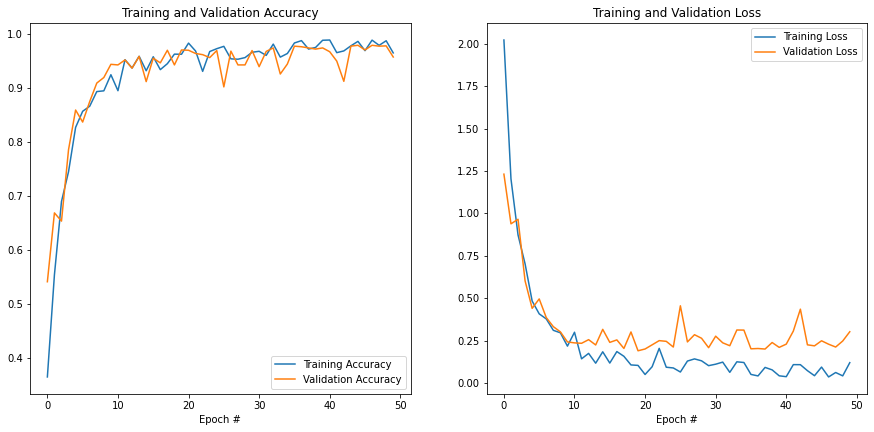

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs_range = range(50)
#plt.style.use("ggplot")
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epoch #")

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch #")
plt.show()

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_two_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        #model one prediction
        model_two_prediction = np.argmax(model2.predict(np.array([img_normalized])))
        model_two_pred.append(model_two_prediction)  
        #model two prediction

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    
    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    print(classification_report(true_value, model_pred, target_names = list(classes)))

Model Accuracy 0.9545454545454546
              precision    recall  f1-score   support

          AC       0.98      0.96      0.97       231
          AD       0.95      0.97      0.96       231
          EC       0.93      0.93      0.93       231
         IMP       0.98      0.97      0.97       231
          PS       0.88      0.97      0.92       231
          SC       0.96      0.97      0.96       231
         TCO       0.99      0.90      0.94       231
          TP       1.00      0.97      0.98       231

    accuracy                           0.95      1848
   macro avg       0.96      0.95      0.95      1848
weighted avg       0.96      0.95      0.95      1848



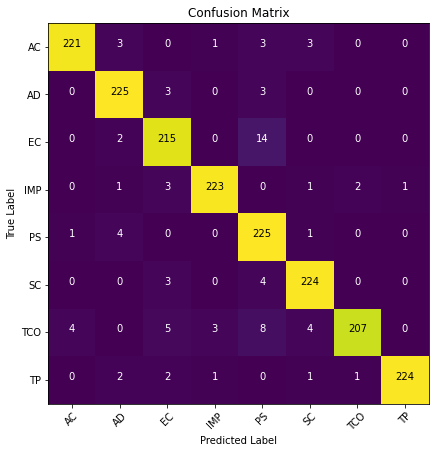

In [ ]:
clf_report(true_value, model_two_pred)

In [ ]:
=============================================== Load and Test Models ==================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================

In [ ]:
model_one= keras.models.load_model('/content/drive/MyDrive/Dataset/Savedmodel/model_one')

In [ ]:
model_two= keras.models.load_model('/content/drive/MyDrive/Dataset/Savedmodel/model_two')

In [ ]:
model_three= keras.models.load_model('/content/drive/MyDrive/Dataset/Savedmodel/model_three')

In [3]:
test_data_dir='/content/drive/MyDrive/SKD/Equalized/Test_data_three'
test_datagen = ImageDataGenerator(rescale=1./255) # set validation split

test_generator = test_datagen.flow_from_directory(test_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)

Found 1848 images belonging to 8 classes.


In [ ]:
model_one.evaluate(test_generator)

58/58 [==============================] - 484s 8s/step - loss: 0.2700 - accuracy: 0.9702


[0.2700285017490387, 0.9702380895614624]

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_one_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_one_prediction = np.argmax(model_one.predict(np.array([img_normalized])))
        model_one_pred.append(model_one_prediction)
        

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    
    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    print(classification_report(true_value, model_pred, target_names = list(classes)))

In [ ]:
=================================================SKDCNET result ======================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================

Model Accuracy 0.9707792207792207
                   precision    recall  f1-score   support

             Acne       0.99      0.98      0.98       231
Atopic Dermatitis       0.97      0.97      0.97       231
           Eczema       0.98      0.97      0.97       231
         Impetigo       0.99      0.97      0.98       231
        Psoriasis       0.93      0.97      0.95       231
          Scabies       0.94      0.97      0.96       231
   Tinea Corporis       0.97      0.97      0.97       231
      Tinea Pedis       0.99      0.98      0.98       231

         accuracy                           0.97      1848
        macro avg       0.97      0.97      0.97      1848
     weighted avg       0.97      0.97      0.97      1848



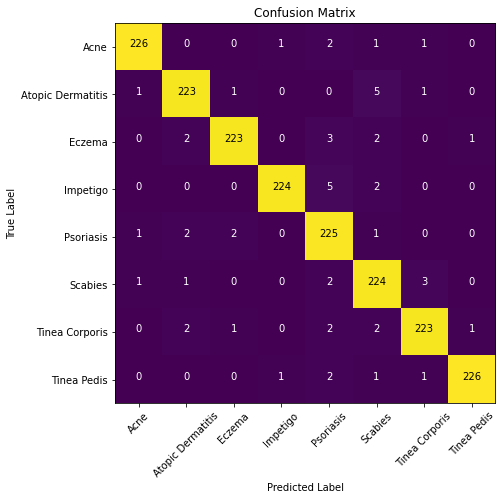

In [ ]:
clf_report(true_value, model_one_pred)    #model one prediction

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_two_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_two_prediction = np.argmax(model_two.predict(np.array([img_normalized])))
        model_two_pred.append(model_two_prediction)
        

In [ ]:
=============================================== VGG16 result ==========================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================

Model Accuracy 0.9545454545454546
                   precision    recall  f1-score   support

             Acne       0.98      0.96      0.97       231
Atopic Dermatitis       0.95      0.97      0.96       231
           Eczema       0.93      0.93      0.93       231
         Impetigo       0.98      0.97      0.97       231
        Psoriasis       0.88      0.97      0.92       231
          Scabies       0.96      0.97      0.96       231
   Tinea Corporis       0.99      0.90      0.94       231
      Tinea Pedis       1.00      0.97      0.98       231

         accuracy                           0.95      1848
        macro avg       0.96      0.95      0.95      1848
     weighted avg       0.96      0.95      0.95      1848



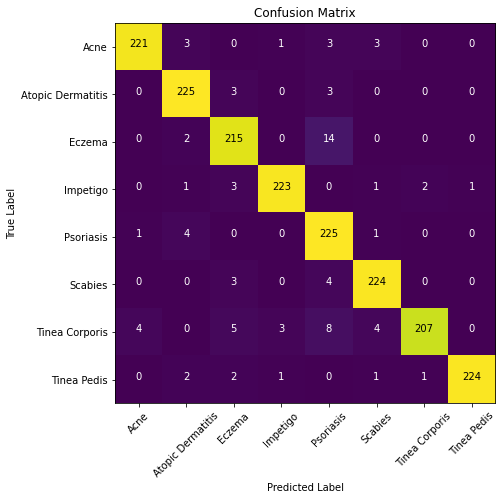

In [ ]:
clf_report(true_value, model_two_pred)    #model two prediction

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_three_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_three_prediction = np.argmax(model_three.predict(np.array([img_normalized])))
        model_three_pred.append(model_three_prediction)
        

Model Accuracy 0.9724025974025974
                   precision    recall  f1-score   support

             Acne       1.00      0.97      0.98       231
Atopic Dermatitis       0.92      0.98      0.95       231
           Eczema       0.97      0.97      0.97       231
         Impetigo       1.00      0.98      0.99       231
        Psoriasis       0.98      0.96      0.97       231
          Scabies       0.95      0.97      0.96       231
   Tinea Corporis       0.98      0.96      0.97       231
      Tinea Pedis       0.97      0.99      0.98       231

         accuracy                           0.97      1848
        macro avg       0.97      0.97      0.97      1848
     weighted avg       0.97      0.97      0.97      1848



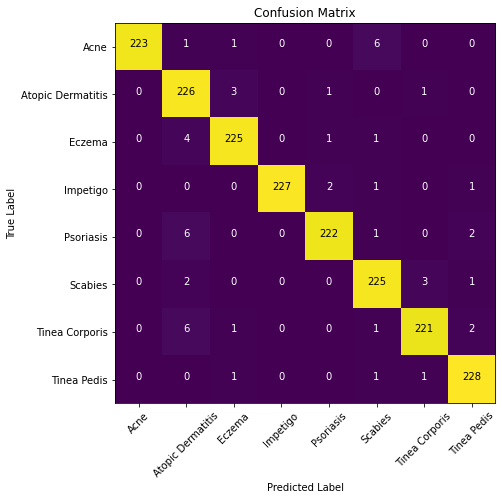

In [ ]:
clf_report(true_value, model_three_pred)    #model three prediction

In [ ]:
#Ensemble prediction

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
model_one_pred = []
model_two_pred = []
model_three_pred = []
ensemble_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_one_prediction = np.argmax(model_one.predict(np.array([img_normalized])))
        model_one_pred.append(model_one_prediction)

        model_two_prediction = np.argmax(model_two.predict(np.array([img_normalized])))
        model_two_pred.append(model_two_prediction)

        model_three_prediction = np.argmax(model_three.predict(np.array([img_normalized])))
        model_three_pred.append(model_three_prediction)
      
        ensemble_model_prediction= mode([model_one_prediction, model_two_prediction, model_three_prediction])                                  
        ensemble_pred.append(ensemble_model_prediction)

In [ ]:
================================================ ESKDCNET test result =================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================

Model Accuracy 0.9745670995670995
                   precision    recall  f1-score   support

             Acne       0.99      0.97      0.98       231
Atopic Dermatitis       0.96      0.98      0.97       231
           Eczema       0.97      0.97      0.97       231
         Impetigo       0.99      0.97      0.98       231
        Psoriasis       0.95      0.97      0.96       231
          Scabies       0.95      0.99      0.97       231
   Tinea Corporis       1.00      0.97      0.98       231
      Tinea Pedis       0.99      0.98      0.98       231

         accuracy                           0.97      1848
        macro avg       0.98      0.97      0.97      1848
     weighted avg       0.98      0.97      0.97      1848



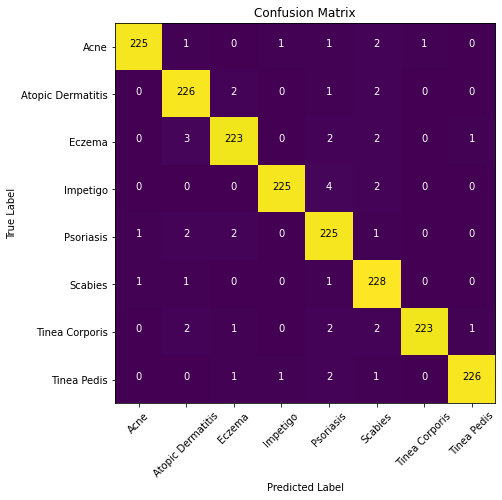

In [ ]:
ensemble_pred = [ c[0] for c in ensemble_pred]
clf_report(true_value, ensemble_pred)        #ensemble model one, two and three

In [ ]:
================================================ Show prediction =====================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================

In [ ]:
import numpy as np
from keras.preprocessing import image

img = image.load_img('/content/drive/MyDrive/SKD/Equalized/Test_data_three/Impetigo/IMP 0.jpg', target_size = (224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

pred=model_two.predict(img)

In [ ]:

pred[:8]


array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0928e-15, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00]], dtype=float32)

In [ ]:
AC=(int(pred[0][0]))
AD=(int(pred[0][1]))
EC=(int(pred[0][2]))
IMP=(int(pred[0][3]))
PS=(int(pred[0][4]))
SC=(int(pred[0][5]))
TC=(int(pred[0][6]))
TP=(int(pred[0][7]))

In [ ]:
#Add_percent to each
ACP="{:.0%}".format(AC)
ADP="{:.0%}".format(AD)
ECP="{:.0%}".format(EC)
IMP="{:.0%}".format(IMP)
PSP="{:.0%}".format(PS)
SCP="{:.0%}".format(SC)
TCP="{:.0%}".format(TC)
TPP="{:.0%}".format(TP)

In [ ]:

print('this image is'+ " "+ ACP+ " " + 'Acne' + " , " + ADP+ " " + 'Atopic Dermitits' + " , "+ ECP+ " " + 'Ecezema' + " , "
+ IMP+ " " + 'Impetigo' + " , " + PSP+ " " + 'Psoriasis' + " , " + SCP+ " " + 'Scabies' + " , " + TCP+ " " + 'Tinea Corporis' + " , " 
+ TPP+ " " + 'Tinea Pedies')


this image is 0% Acne , 0% Atopic Dermitits , 0% Ecezema , 0% Impetigo , 0% Psoriasis , 0% Scabies , 0% Tinea Corporis , 100% Tinea Pedies


In [ ]:
import numpy as np
from keras.preprocessing import image

img = image.load_img('/content/drive/MyDrive/SKD/Equalized/Test_data_three/Impetigo/IMP 8.jpg', target_size = (224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

pred=model_two.predict(img)

In [ ]:
  def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

In [ ]:
model_one_pred=[]
model_two_pred=[]
model_three_pred=[]
ensemble_pred=[]

In [ ]:
model_one_prediction = np.argmax(model_one.predict(img))
model_one_pred.append(model_one_prediction)
model_two_prediction = np.argmax(model_two.predict(img))
model_two_pred.append(model_two_prediction)

model_three_prediction = np.argmax(model_three.predict(img))
model_three_pred.append(model_three_prediction)
      
ensemble_model_prediction= max([model_one_prediction, model_two_prediction, model_three_prediction])                                  
ensemble_pred.append(ensemble_model_prediction)

In [ ]:
ensemble_pred

[[5, 7, 6], [5, 7, 6], [6], [2, 6, 1], [2, 6, 1], 6]

In [ ]:
print(max(ensemble_pred))

[6]


In [ ]:
================================================ Comparision =========================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================
=======================================================================================================================================

In [ ]:
train_data_dir='/content/drive/MyDrive/SKD/Equalized/GAUSIAN_BLURED_AUGMENTED'
test_data_dir='/content/drive/MyDrive/SKD/Equalized/Test_data_three'


train_datagen = ImageDataGenerator(rescale=1./255) # set validation split

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)
validation_generator = train_datagen.flow_from_directory(test_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)


Found 4368 images belonging to 8 classes.
Found 1848 images belonging to 8 classes.


In [ ]:
#pretraind VGG16

In [ ]:
AlexNet=Sequential([
                    layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2,2)),
                    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(3,3)),
                    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
                    layers.BatchNormalization(),
                    layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
                    layers.BatchNormalization(),
                    layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2,2)),
                    layers.Flatten(),
                    layers.Dense(1024,activation='relu'),
                    layers.Dropout(0.5),
                    layers.Dense(1024,activation='relu'),
                    layers.Dropout(0.5),
                    layers.Dense(8,activation='softmax') ])

In [ ]:
AlexNet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
AlexNet_history=AlexNet.fit(train_generator, 
                         epochs=50, 
                        validation_data=validation_generator
                         )


Epoch 1/50
137/137 [==============================] - 1887s 13s/step - loss: 2.6597 - accuracy: 0.2647 - val_loss: 2.0467 - val_accuracy: 0.1856
Epoch 2/50
137/137 [==============================] - 22s 160ms/step - loss: 1.8174 - accuracy: 0.3478 - val_loss: 2.8799 - val_accuracy: 0.2522
Epoch 3/50
137/137 [==============================] - 22s 160ms/step - loss: 1.6170 - accuracy: 0.4196 - val_loss: 6.2555 - val_accuracy: 0.2251
Epoch 4/50
137/137 [==============================] - 22s 159ms/step - loss: 1.4937 - accuracy: 0.4636 - val_loss: 1.4358 - val_accuracy: 0.4930
Epoch 5/50
137/137 [==============================] - 22s 160ms/step - loss: 1.3428 - accuracy: 0.5201 - val_loss: 1.3631 - val_accuracy: 0.5157
Epoch 6/50
137/137 [==============================] - 22s 160ms/step - loss: 1.2038 - accuracy: 0.5620 - val_loss: 2.0634 - val_accuracy: 0.3344
Epoch 7/50
137/137 [==============================] - 22s 160ms/step - loss: 1.0934 - accuracy: 0.6149 - val_loss: 1.6184 - val_ac

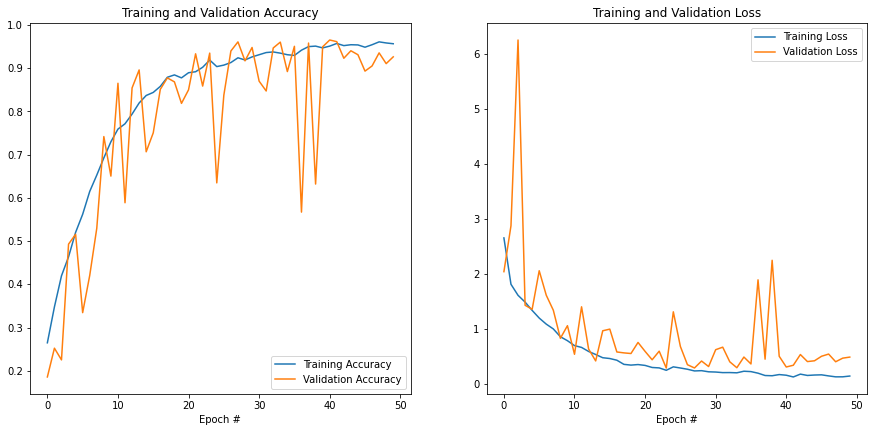

In [ ]:
acc = AlexNet_history.history['accuracy']
val_acc = AlexNet_history.history['val_accuracy']
loss = AlexNet_history.history['loss']
val_loss = AlexNet_history.history['val_loss']
epochs_range = range(50)
#plt.style.use("ggplot")
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epoch #")

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch #")
plt.show()

In [ ]:
AlexNet.save('/content/drive/MyDrive/Compared Model/AlexNet')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Compared Model/AlexNet/assets


In [ ]:
test_data_dir='/content/drive/MyDrive/SKD/Equalized/Test_data_three'
test_datagen = ImageDataGenerator(rescale=1./255) # set validation split

test_generator = test_datagen.flow_from_directory(test_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)

Found 1848 images belonging to 8 classes.


In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
alexnet_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_one_prediction = np.argmax(AlexNet.predict(np.array([img_normalized])))
        alexnet_pred.append(model_one_prediction)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    
    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    print(classification_report(true_value, model_pred, target_names = list(classes)))

Model Accuracy 0.9264069264069265
                   precision    recall  f1-score   support

             Acne       1.00      0.87      0.93       231
Atopic Dermatitis       0.95      0.90      0.93       231
           Eczema       0.92      0.91      0.92       231
         Impetigo       0.96      0.95      0.95       231
        Psoriasis       0.92      0.95      0.94       231
          Scabies       0.92      0.91      0.92       231
   Tinea Corporis       0.86      0.96      0.91       231
      Tinea Pedis       0.91      0.95      0.93       231

         accuracy                           0.93      1848
        macro avg       0.93      0.93      0.93      1848
     weighted avg       0.93      0.93      0.93      1848



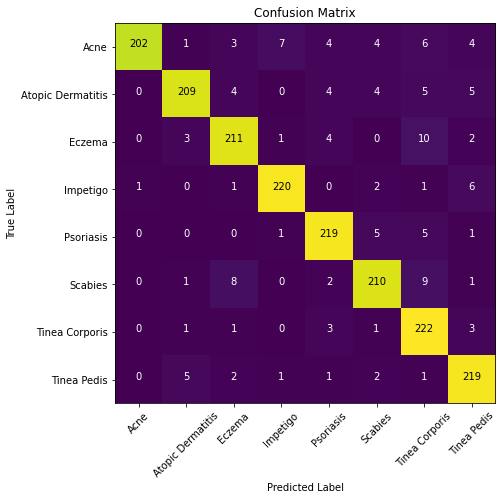

In [ ]:
clf_report(true_value, alexnet_pred)    #model one prediction

In [ ]:
==================================VGG16=======================================

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16()

553476096/553467096 [==============================] - 5s 0us/step


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False ## Not trainable weights


58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import layers, models
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(4096, activation='relu')
dense_layer_21 = layers.Dropout(0.01)
dense_layer_2 = layers.Dense(4096, activation='relu')
dense_layer_22 = layers.Dropout(0.01)
prediction_layer = layers.Dense(8, activation='softmax')

In [ ]:
Vgg16model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_21,
    dense_layer_2,
    dense_layer_22,
    prediction_layer
])

In [ ]:
Vgg16model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
VGG16model_history=Vgg16model.fit(train_generator, 
                         epochs=50, 
                        validation_data=validation_generator
                         )

Epoch 1/50
137/137 [==============================] - 4031s 29s/step - loss: 2.7007 - accuracy: 0.3473 - val_loss: 1.2988 - val_accuracy: 0.4886
Epoch 2/50
137/137 [==============================] - 51s 373ms/step - loss: 1.1807 - accuracy: 0.5659 - val_loss: 1.1739 - val_accuracy: 0.5671
Epoch 3/50
137/137 [==============================] - 51s 373ms/step - loss: 0.9292 - accuracy: 0.6587 - val_loss: 0.7289 - val_accuracy: 0.7424
Epoch 4/50
137/137 [==============================] - 51s 373ms/step - loss: 0.7403 - accuracy: 0.7264 - val_loss: 0.6247 - val_accuracy: 0.7965
Epoch 5/50
137/137 [==============================] - 51s 374ms/step - loss: 0.5671 - accuracy: 0.8004 - val_loss: 0.4524 - val_accuracy: 0.8653
Epoch 6/50
137/137 [==============================] - 51s 373ms/step - loss: 0.4696 - accuracy: 0.8340 - val_loss: 0.5021 - val_accuracy: 0.8490
Epoch 7/50
137/137 [==============================] - 51s 373ms/step - loss: 0.3681 - accuracy: 0.8700 - val_loss: 0.4652 - val_ac

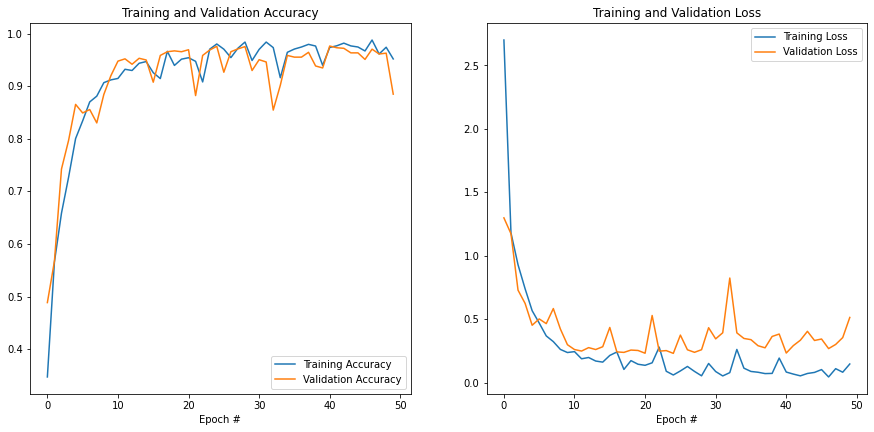

In [ ]:
acc = VGG16model_history.history['accuracy']
val_acc = VGG16model_history.history['val_accuracy']
loss = VGG16model_history.history['loss']
val_loss = VGG16model_history.history['val_loss']
epochs_range = range(50)
#plt.style.use("ggplot")
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epoch #")

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch #")
plt.show()

In [ ]:
test_data_dir='/content/drive/MyDrive/SKD/Equalized/Test_data_three'
test_datagen = ImageDataGenerator(rescale=1./255) # set validation split

test_generator = test_datagen.flow_from_directory(test_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)

Found 1848 images belonging to 8 classes.


In [ ]:
Vgg16model.save('/content/drive/MyDrive/Compared Model/pVGG16')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Compared Model/pVGG16/assets


In [ ]:
Vgg16mode=keras.models.load_model('/content/drive/MyDrive/Compared Model/pVGG16')

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
alexnet_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_one_prediction = np.argmax(Vgg16mode.predict(np.array([img_normalized])))
        alexnet_pred.append(model_one_prediction)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    
    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass

    print(classification_report(true_value, model_pred, target_names = list(classes)))

Model Accuracy 0.8852813852813853
                   precision    recall  f1-score   support

             Acne       0.87      0.96      0.91       231
Atopic Dermatitis       0.91      0.92      0.91       231
           Eczema       0.89      0.97      0.93       231
         Impetigo       1.00      0.90      0.95       231
        Psoriasis       0.98      0.56      0.71       231
          Scabies       0.71      0.95      0.81       231
   Tinea Corporis       0.86      0.97      0.91       231
      Tinea Pedis       0.99      0.86      0.92       231

         accuracy                           0.89      1848
        macro avg       0.90      0.89      0.88      1848
     weighted avg       0.90      0.89      0.88      1848



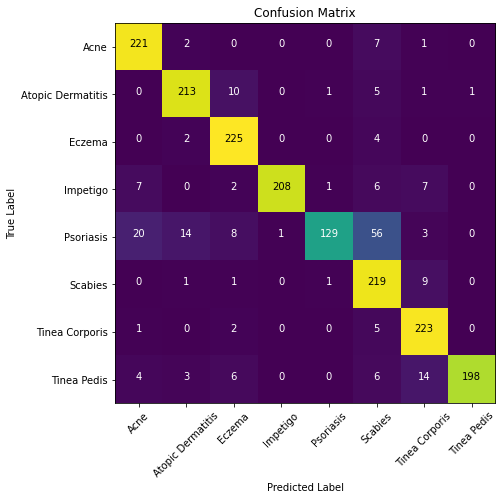

In [ ]:
clf_report(true_value, alexnet_pred)    #model one prediction

In [ ]:
================================ComparedAllModels===============================================
================================================================================================

In [ ]:
AlexNet=tf.keras.models.load_model('/content/drive/MyDrive/Compared Model/AlexNet')
pVGG16=tf.keras.models.load_model('/content/drive/MyDrive/Compared Model/pVGG16')

In [ ]:
SKDCNET=tf.keras.models.load_model('/content/drive/MyDrive/Dataset/Savedmodel/model_one')
FVGG16=tf.keras.models.load_model('/content/drive/MyDrive/Dataset/Savedmodel/model_two')
InceptionV3=tf.keras.models.load_model('/content/drive/MyDrive/Dataset/Savedmodel/model_three')

In [ ]:
ensemble of AlexNet, PVGG16, and SKDCNET

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
alexnet_pred = []
pvgg16_pred=[]
skdcnet_pred=[]
ensemble_pred=[]
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_one_prediction = np.argmax(AlexNet.predict(np.array([img_normalized])))
        alexnet_pred.append(model_one_prediction)
        model_two_prediction = np.argmax(pVGG16.predict(np.array([img_normalized])))
        pvgg16_pred.append(model_two_prediction)
        model_three_prediction = np.argmax(SKDCNET.predict(np.array([img_normalized])))
        skdcnet_pred.append(model_three_prediction)
        ensemble_model_prediction= mode([model_one_prediction, model_two_prediction, model_three_prediction]) 
        ensemble_pred.append(ensemble_model_prediction)


Model Accuracy 0.9691558441558441
                   precision    recall  f1-score   support

             Acne       1.00      0.96      0.98       231
Atopic Dermatitis       1.00      0.95      0.97       231
           Eczema       0.99      0.97      0.98       231
         Impetigo       1.00      0.97      0.98       231
        Psoriasis       0.99      0.95      0.97       231
          Scabies       0.93      0.98      0.95       231
   Tinea Corporis       0.92      0.99      0.95       231
      Tinea Pedis       0.95      0.99      0.97       231

         accuracy                           0.97      1848
        macro avg       0.97      0.97      0.97      1848
     weighted avg       0.97      0.97      0.97      1848



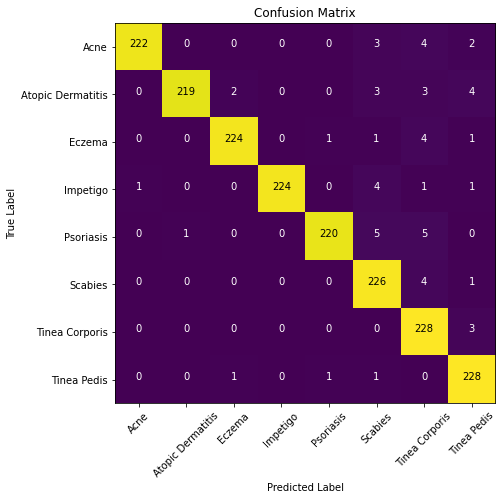

In [ ]:
ensemble_pred = [ c[0] for c in ensemble_pred]
clf_report(true_value, ensemble_pred) 

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
alexnet_pred = []
fvgg16_pred=[]
skdcnet_pred=[]
ensemble_pred=[]
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_one_prediction = np.argmax(AlexNet.predict(np.array([img_normalized])))
        alexnet_pred.append(model_one_prediction)
        model_two_prediction = np.argmax(FVGG16.predict(np.array([img_normalized])))
        fvgg16_pred.append(model_two_prediction)
        model_three_prediction = np.argmax(SKDCNET.predict(np.array([img_normalized])))
        skdcnet_pred.append(model_three_prediction)
        ensemble_model_prediction= mode([model_one_prediction, model_two_prediction, model_three_prediction]) 
        ensemble_pred.append(ensemble_model_prediction)


Model Accuracy 0.9718614718614719
                   precision    recall  f1-score   support

             Acne       1.00      0.96      0.98       231
Atopic Dermatitis       1.00      0.97      0.98       231
           Eczema       0.99      0.97      0.98       231
         Impetigo       1.00      0.97      0.98       231
        Psoriasis       0.97      0.97      0.97       231
          Scabies       0.95      0.97      0.96       231
   Tinea Corporis       0.92      0.98      0.95       231
      Tinea Pedis       0.95      0.99      0.97       231

         accuracy                           0.97      1848
        macro avg       0.97      0.97      0.97      1848
     weighted avg       0.97      0.97      0.97      1848



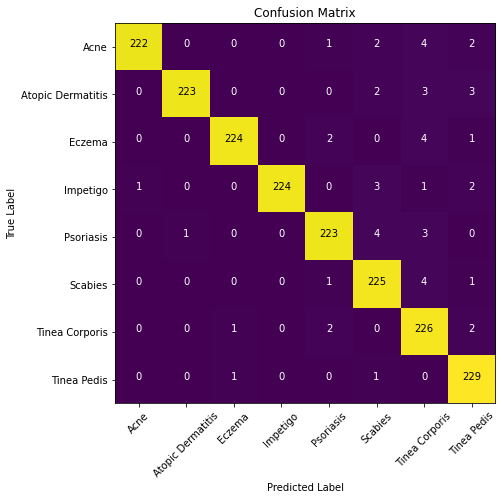

In [ ]:
ensemble_pred = [ c[0] for c in ensemble_pred]
clf_report(true_value, ensemble_pred) 

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
alexnet_pred = []
fvgg16_pred=[]
inceptionv3_pred=[]
ensemble_pred=[]
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        model_one_prediction = np.argmax(AlexNet.predict(np.array([img_normalized])))
        alexnet_pred.append(model_one_prediction)
        model_two_prediction = np.argmax(FVGG16.predict(np.array([img_normalized])))
        fvgg16_pred.append(model_two_prediction)
        model_three_prediction = np.argmax(InceptionV3.predict(np.array([img_normalized])))
        inceptionv3_pred.append(model_three_prediction)
        ensemble_model_prediction= mode([model_one_prediction, model_two_prediction, model_three_prediction]) 
        ensemble_pred.append(ensemble_model_prediction)


Model Accuracy 0.9751082251082251
                   precision    recall  f1-score   support

             Acne       1.00      0.96      0.98       231
Atopic Dermatitis       0.99      0.98      0.98       231
           Eczema       0.97      0.97      0.97       231
         Impetigo       1.00      0.97      0.98       231
        Psoriasis       1.00      0.96      0.98       231
          Scabies       0.95      0.98      0.96       231
   Tinea Corporis       0.93      0.99      0.96       231
      Tinea Pedis       0.97      0.99      0.98       231

         accuracy                           0.98      1848
        macro avg       0.98      0.98      0.98      1848
     weighted avg       0.98      0.98      0.98      1848



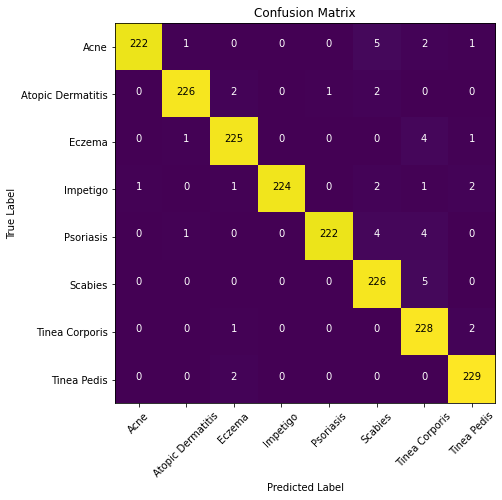

In [ ]:
ensemble_pred = [ c[0] for c in ensemble_pred]
clf_report(true_value, ensemble_pred) 

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
alexnet_pred = []
pvgg16_pred=[]
inceptionv3_pred=[]
ensemble_pred=[]
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_one_prediction = np.argmax(pVGG16.predict(np.array([img_normalized])))
        alexnet_pred.append(model_one_prediction)
        model_two_prediction = np.argmax(SKDCNET.predict(np.array([img_normalized])))
        fvgg16_pred.append(model_two_prediction)
        model_three_prediction = np.argmax(FVGG16.predict(np.array([img_normalized])))
        inceptionv3_pred.append(model_three_prediction)
        ensemble_model_prediction= mode([model_one_prediction, model_two_prediction, model_three_prediction]) 
        ensemble_pred.append(ensemble_model_prediction)


Model Accuracy 0.9696969696969697
                   precision    recall  f1-score   support

             Acne       1.00      0.96      0.98       231
Atopic Dermatitis       0.97      0.97      0.97       231
           Eczema       0.95      0.97      0.96       231
         Impetigo       1.00      0.97      0.98       231
        Psoriasis       0.97      0.97      0.97       231
          Scabies       0.91      0.98      0.94       231
   Tinea Corporis       0.98      0.97      0.97       231
      Tinea Pedis       1.00      0.98      0.99       231

         accuracy                           0.97      1848
        macro avg       0.97      0.97      0.97      1848
     weighted avg       0.97      0.97      0.97      1848



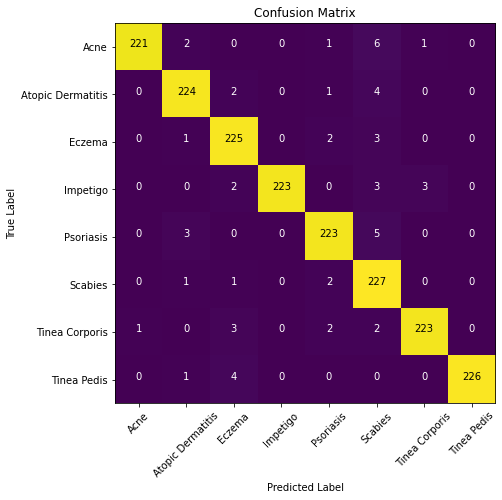

In [ ]:
ensemble_pred = [ c[0] for c in ensemble_pred]
clf_report(true_value, ensemble_pred)

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
alexnet_pred = []
pvgg16_pred=[]
inceptionv3_pred=[]
ensemble_pred=[]
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_one_prediction = np.argmax(pVGG16.predict(np.array([img_normalized])))
        alexnet_pred.append(model_one_prediction)
        model_two_prediction = np.argmax(FVGG16.predict(np.array([img_normalized])))
        fvgg16_pred.append(model_two_prediction)
        model_three_prediction = np.argmax(InceptionV3.predict(np.array([img_normalized])))
        inceptionv3_pred.append(model_three_prediction)
        ensemble_model_prediction= mode([model_one_prediction, model_two_prediction, model_three_prediction]) 
        ensemble_pred.append(ensemble_model_prediction)


Model Accuracy 0.9713203463203464
                   precision    recall  f1-score   support

             Acne       1.00      0.96      0.98       231
Atopic Dermatitis       0.97      0.98      0.97       231
           Eczema       0.95      0.98      0.96       231
         Impetigo       1.00      0.97      0.98       231
        Psoriasis       0.99      0.96      0.97       231
          Scabies       0.90      0.99      0.94       231
   Tinea Corporis       0.98      0.97      0.97       231
      Tinea Pedis       1.00      0.98      0.99       231

         accuracy                           0.97      1848
        macro avg       0.97      0.97      0.97      1848
     weighted avg       0.97      0.97      0.97      1848



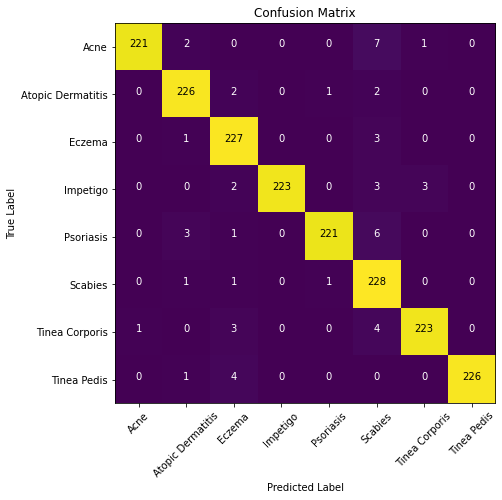

In [ ]:
ensemble_pred = [ c[0] for c in ensemble_pred]
clf_report(true_value, ensemble_pred)

In [ ]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
alexnet_pred = []
pvgg16_pred=[]
inceptionv3_pred=[]
ensemble_pred=[]
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_one_prediction = np.argmax(SKDCNET.predict(np.array([img_normalized])))
        alexnet_pred.append(model_one_prediction)
        model_two_prediction = np.argmax(InceptionV3.predict(np.array([img_normalized])))
        fvgg16_pred.append(model_two_prediction)
        model_three_prediction = np.argmax(AlexNet.predict(np.array([img_normalized])))
        inceptionv3_pred.append(model_three_prediction)
        ensemble_model_prediction= mode([ model_three_prediction,model_one_prediction,model_two_prediction]) 
        ensemble_pred.append(ensemble_model_prediction)


Model Accuracy 0.9751082251082251
                   precision    recall  f1-score   support

             Acne       1.00      0.96      0.98       231
Atopic Dermatitis       0.99      0.97      0.98       231
           Eczema       0.99      0.97      0.98       231
         Impetigo       1.00      0.97      0.99       231
        Psoriasis       1.00      0.97      0.98       231
          Scabies       0.95      0.98      0.97       231
   Tinea Corporis       0.92      0.99      0.95       231
      Tinea Pedis       0.96      0.99      0.98       231

         accuracy                           0.98      1848
        macro avg       0.98      0.98      0.98      1848
     weighted avg       0.98      0.98      0.98      1848



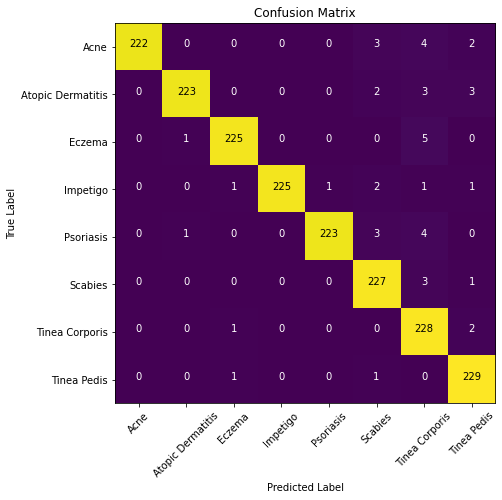

In [ ]:
ensemble_pred = [ c[0] for c in ensemble_pred]
clf_report(true_value, ensemble_pred)

In [ ]:
======================================

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16_model = tf.keras.applications.vgg16.VGG16()
model2 = Sequential()
for layer in vgg16_model.layers[:-3]:   #remove last layers 
    model2.add(layer)
for layer in model2.layers:
    layer.trainable = False
model2.add(Dense(units=1024, activation='relu')),
#model2.add(Dropout(0.01))
model2.add(Dense(units=1024, activation='relu')),
#model1.add(Dropout(0.01))
model2.add(Dense(units=8, activation='softmax'))


model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
history2=model2.fit(
    train_generator, epochs=50, validation_data=validation_generator
)

553476096/553467096 [==============================] - 7s 0us/step
Epoch 1/50
137/137 [==============================] - 1540s 11s/step - loss: 2.0554 - accuracy: 0.3480 - val_loss: 1.2400 - val_accuracy: 0.5606
Epoch 2/50
137/137 [==============================] - 58s 425ms/step - loss: 1.1089 - accuracy: 0.5856 - val_loss: 0.7940 - val_accuracy: 0.7273
Epoch 3/50
137/137 [==============================] - 58s 425ms/step - loss: 0.8069 - accuracy: 0.7058 - val_loss: 0.8037 - val_accuracy: 0.7192
Epoch 4/50
137/137 [==============================] - 58s 424ms/step - loss: 0.5970 - accuracy: 0.7834 - val_loss: 0.4514 - val_accuracy: 0.8663
Epoch 5/50
137/137 [==============================] - 58s 424ms/step - loss: 0.4443 - accuracy: 0.8384 - val_loss: 0.5016 - val_accuracy: 0.8544
Epoch 6/50
137/137 [==============================] - 58s 424ms/step - loss: 0.3759 - accuracy: 0.8622 - val_loss: 0.4735 - val_accuracy: 0.8366
Epoch 7/50
137/137 [==============================] - 58s 424ms

In [ ]:
model2.save("/content/drive/MyDrive/Last Models/VGG162")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Last Models/VGG162/assets


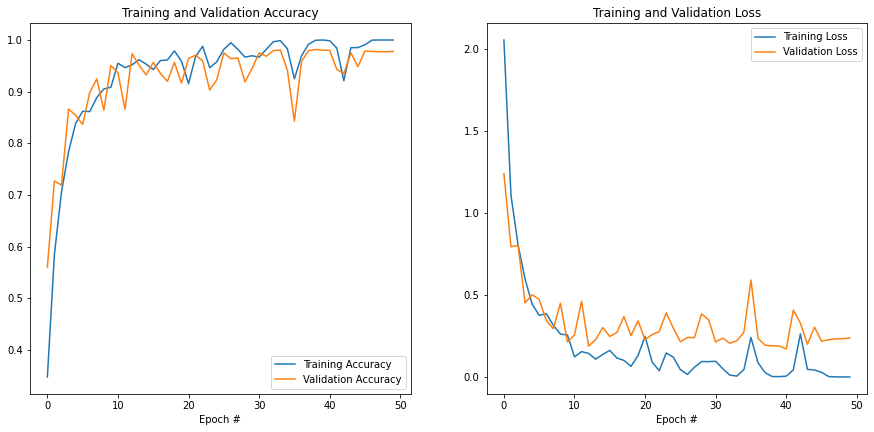

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs_range = range(50)
#plt.style.use("ggplot")
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epoch #")

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch #")
plt.show()

In [4]:
SKDCNET= keras.models.load_model('/content/drive/MyDrive/Dataset/Savedmodel/model_one')
FVGG16= keras.models.load_model('/content/drive/MyDrive/Dataset/Savedmodel/model_two')
InceptionV3= keras.models.load_model('/content/drive/MyDrive/Dataset/Savedmodel/model_three')

In [5]:
VGG16f=keras.models.load_model('/content/drive/MyDrive/Last Models/VGG162')

In [ ]:
test_data_dir='/content/drive/MyDrive/SKD/Equalized/Test_data_three'
test_datagen = ImageDataGenerator(rescale=1./255) # set validation split

test_generator = test_datagen.flow_from_directory(test_data_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32)

Found 1848 images belonging to 8 classes.


In [6]:
def mode(my_list):
    ct = Counter(my_list)
    max_value = max(ct.values())
    return ([key for key, value in ct.items() if value == max_value])

true_value = []
SKDCNET_pred = []
FVGG16_pred = []
InceptionV3_pred = []
#AlexNet_pred=[]
pVGG_pred=[]
ensemble_pred = []
for folder in os.listdir(test_data_dir):
    
    test_image_ids = os.listdir(os.path.join(test_data_dir,folder))
    
    for image_id in test_image_ids[:int(len(test_image_ids))]:
        
        path = os.path.join(test_data_dir,folder,image_id)
        
        true_value.append(test_generator.class_indices[folder])
        img = cv2.resize(cv2.imread(path),(224,224))
        img_normalized = img/255
        
        model_onep_prediction = np.argmax(FVGG16.predict(np.array([img_normalized])))
        pVGG_pred.append(model_onep_prediction)

        model_one_prediction = np.argmax(SKDCNET.predict(np.array([img_normalized])))
        SKDCNET_pred.append(model_one_prediction)

        model_two_prediction = np.argmax(VGG16f.predict(np.array([img_normalized])))
        FVGG16_pred.append(model_two_prediction)

        model_three_prediction = np.argmax(InceptionV3.predict(np.array([img_normalized])))
        InceptionV3_pred.append(model_three_prediction)
      
        ensemble_model_prediction= mode([model_one_prediction, model_two_prediction, model_three_prediction,model_onep_prediction])                                  
        ensemble_pred.append(ensemble_model_prediction)

In [7]:
from sklearn.metrics import confusion_matrix
import itertools
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    
    classes = test_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Proposed (ESKDCNET) Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    print(classification_report(true_value, model_pred, target_names = list(classes)))

Proposed (ESKDCNET) Model Accuracy 0.9756493506493507
                   precision    recall  f1-score   support

             Acne       1.00      0.96      0.98       231
Atopic Dermatitis       0.97      0.98      0.97       231
           Eczema       0.97      0.97      0.97       231
         Impetigo       0.99      0.97      0.98       231
        Psoriasis       0.94      0.99      0.96       231
          Scabies       0.95      0.99      0.97       231
   Tinea Corporis       1.00      0.96      0.98       231
      Tinea Pedis       0.99      0.98      0.99       231

         accuracy                           0.98      1848
        macro avg       0.98      0.98      0.98      1848
     weighted avg       0.98      0.98      0.98      1848



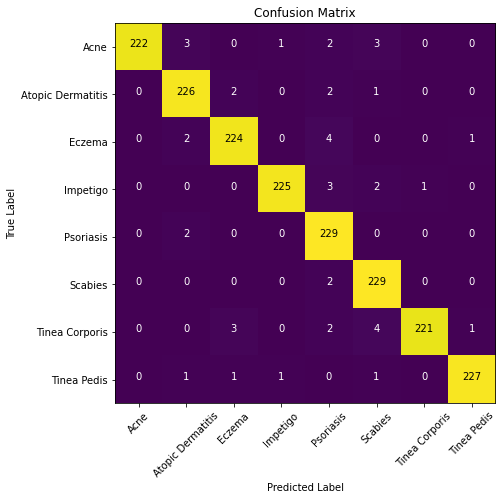

In [8]:
ensemble_pred = [ c[0] for c in ensemble_pred]
clf_report(true_value, ensemble_pred) 